In [1167]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["figure.figsize"] = (20, 10)

## Training Environments
Different configurations of agents and thus differents dynamic of price and volume to train the rl agent


## Orderbook

In [1250]:
result_dir = Path("result/test")
security_path = result_dir / "TSMC.json"
agent_path = result_dir / "agent.json"
tsmc = pd.read_json(security_path)

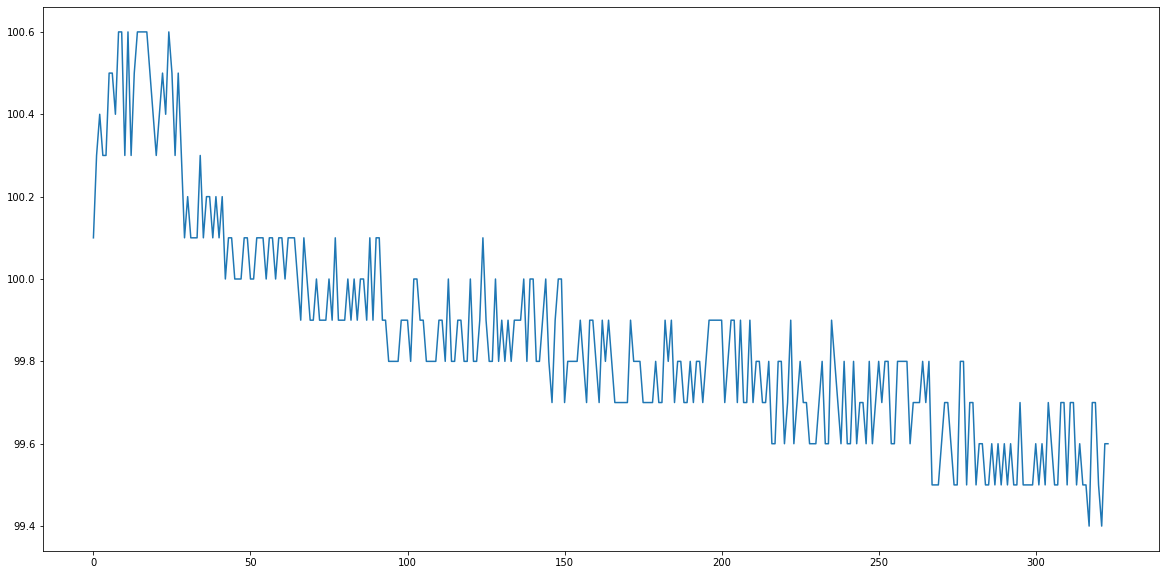

In [1251]:
plt.plot(tsmc['close'])

In [1256]:
tsmc

,open,high,low,close,average,volume,amount,bid,ask,price_volume,bid_five_price,ask_five_price
0,100.0,100.4,99.5,100.1,99.92,125,1249030,99.9,100.2,"{'99.9': 16, '100.2': 16, '100.1': 14, '99.8':...","{'99.9': 4, '99.7': 7, '99.6': 2, '99.5': 15, ...","{'100.2': 7, '100.3': 16, '100.4': 14, '100.5'..."
1,100.1,100.3,99.7,100.3,100.11,121,1211390,100.2,100.4,"{'99.9': 33, '100.2': 50, '100.1': 44, '99.8':...","{'100.2': 7, '100.0': 10, '99.9': 11, '99.8': ...","{'100.4': 38, '100.5': 53, '100.6': 36, '100.7..."
2,100.3,100.4,100.1,100.4,100.31,120,1203710,100.3,100.4,"{'99.9': 33, '100.2': 78, '100.1': 48, '99.8':...","{'100.3': 3, '100.1': 13, '100.0': 37, '99.9':...","{'100.4': 19, '100.5': 63, '100.6': 49, '100.7..."
3,100.4,100.4,100.1,100.3,100.28,115,1153200,100.3,100.4,"{'99.9': 33, '100.2': 95, '100.1': 71, '99.8':...","{'100.3': 1, '100.2': 3, '100.1': 25, '100.0':...","{'100.4': 11, '100.5': 92, '100.6': 83, '100.7..."
4,100.3,100.5,100.1,100.3,100.36,113,1134110,100.3,100.5,"{'99.9': 33, '100.2': 110, '100.1': 74, '99.8'...","{'100.3': 1, '100.2': 21, '100.1': 31, '100.0'...","{'100.5': 84, '100.6': 105, '100.7': 104, '100..."
...,...,...,...,...,...,...,...,...,...,...,...,...
319,99.7,99.7,99.4,99.7,99.54,126,1254220,99.4,99.7,"{'99.9': 5512, '100.2': 1444, '100.1': 3389, '...","{'99.4': 1790, '99.3': 2104, '99.2': 2031, '99...","{'99.7': 548, '99.8': 1885, '99.9': 3137, '100..."
320,99.7,99.7,99.4,99.5,99.55,112,1115000,99.4,99.5,"{'99.9': 5512, '100.2': 1444, '100.1': 3389, '...","{'99.4': 1777, '99.3': 2115, '99.2': 2046, '99...","{'99.5': 2, '99.7': 619, '99.8': 1912, '99.9':..."
321,99.5,99.5,99.4,99.4,99.46,86,855380,99.4,99.5,"{'99.9': 5512, '100.2': 1444, '100.1': 3389, '...","{'99.4': 1756, '99.3': 2127, '99.2': 2070, '99...","{'99.5': 18, '99.6': 121, '99.7': 634, '99.8':..."
322,99.4,99.6,99.4,99.6,99.45,192,1909390,99.5,99.6,"{'99.9': 5512, '100.2': 1444, '100.1': 3389, '...","{'99.5': 4, '99.4': 1652, '99.3': 2140, '99.2'...","{'99.6': 128, '99.7': 696, '99.8': 1952, '99.9..."


###  Kbar

In [1170]:
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from IPython import display
import time

def candlestick(quote, width=0.2, colorup='r', colordown='g', alpha=1):
    OFFSET = width/2.0
    time, open, high, low, close = quote[:5]
    if close >= open:
        color = colorup
        lower = open
        height = close - open
    else:
        color = colordown
        lower = close
        height = open - close
    vline = Line2D(xdata=(time, time), ydata=(low,high), color=color, linewidth=0.5,antialiased=True,)
    rect = Rectangle(xy = (time-OFFSET, lower), width = width, height = height, facecolor = color, edgecolor = color)
    return vline, rect

def candlestick_K(ax, quotes, width=0.2, colorup='r', colordown='g', alpha=1):
    lines = []
    patches = []
    for q in quotes:
        vline, rect = candlestick(q, width, colorup, colordown, alpha)
        rect.set_alpha(alpha)
        lines.append(vline)
        patches.append(rect)
        ax.add_line(vline)
        ax.add_patch(rect)    
    ax.autoscale_view()

def candlestick_play(ax, quotes, width=0.2, colorup='r', colordown='g', alpha=1):
    ax.set_xlim((0, len(quotes)))
    for i in range(len(quotes)):
        vline, rect = candlestick(quotes[i])
        ax.add_line(vline)
        ax.add_patch(rect)
        ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()
        display.display(plt.gcf())
        clear_output(wait=True)

In [1252]:
minute_kbar = []
five_minute_kbar = []
fifteen_minute_kbar = []
for i in range(len(tsmc)):
    if i > 0 and i % 60 == 0:
        minute_kbar.append([i//60, tsmc[i-60:i-59]['open'][i-60], tsmc[i-60:i]['high'].max(), tsmc[i-60:i]['low'].min(), tsmc[i-1:i]['close'][i-1]])
    if i > 0 and i % 300 == 0:
        five_minute_kbar.append([i//300, tsmc[i-300:i-299]['open'][i-300], tsmc[i-300:i]['high'].max(), tsmc[i-300:i]['low'].min(), tsmc[i-1:i]['close'][i-1]])
    if i > 0 and i % 900 == 0:
        fifteen_minute_kbar.append([i//900, tsmc[i-900:i-899]['open'][i-900], tsmc[i-900:i]['high'].max(), tsmc[i-900:i]['low'].min(), tsmc[i-1:i]['close'][i-1]])


#### Minute kbar

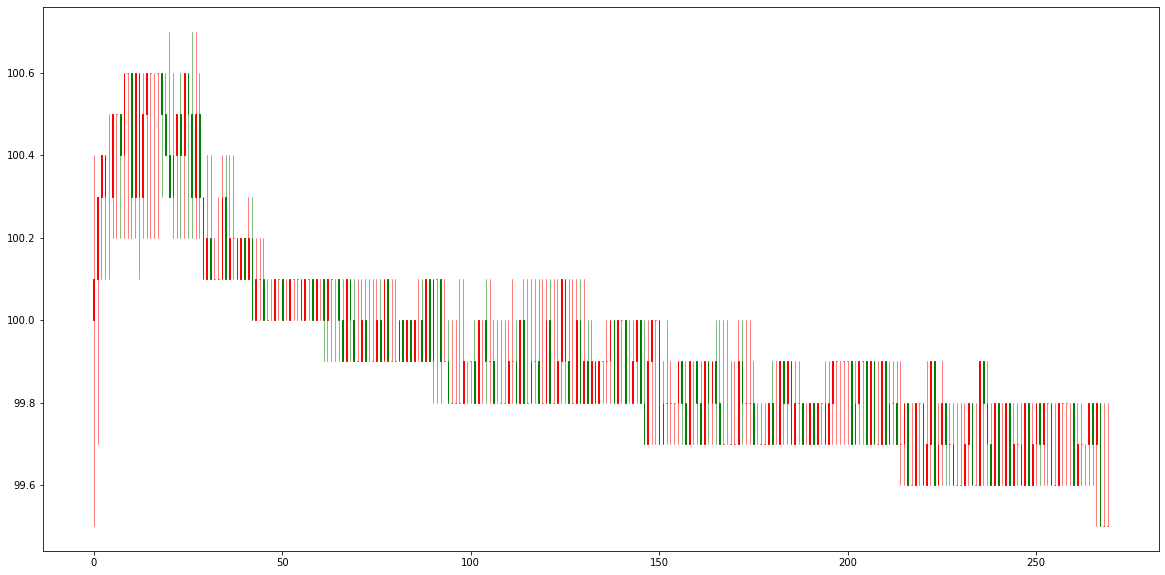

In [1253]:
small = []
for item in tsmc[:270].iterrows():
    small.append( [item[0]] + list(item[1][:4]) )

fig, ax = plt.subplots(figsize = (20, 10))
candlestick_K(ax, small)

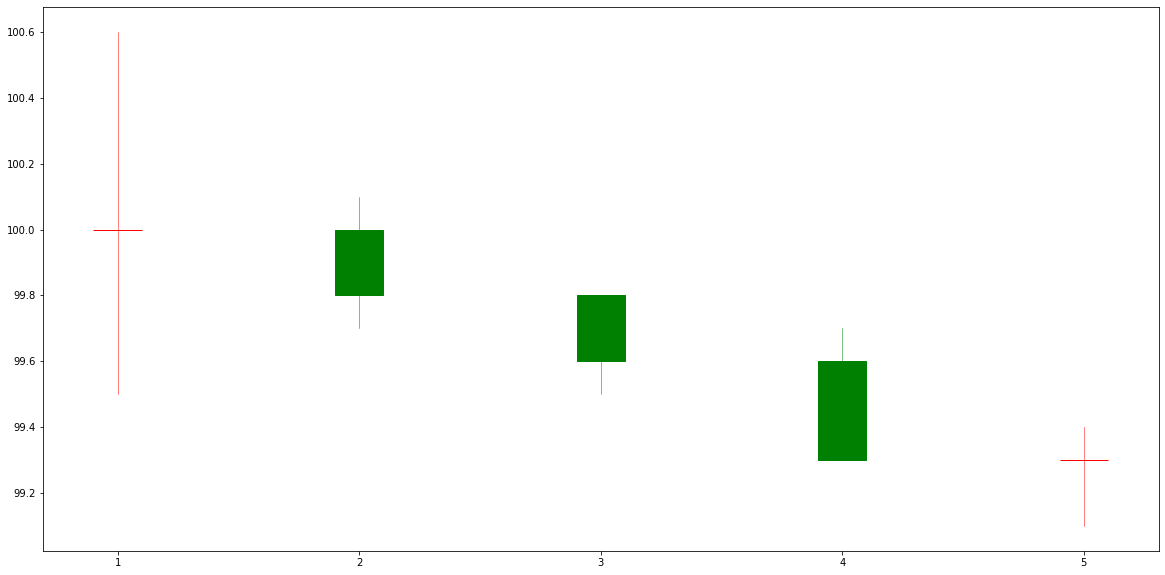

In [1173]:
fig, ax = plt.subplots(figsize = (20, 10))
candlestick_K(ax, minute_kbar)

In [1174]:
# fig, ax = plt.subplots(figsize=(20, 10))
# # ax.set_xlim((0, len(minute_kbar)))
# candlestick_play(ax, minute_kbar)

#### Five minutes kbar

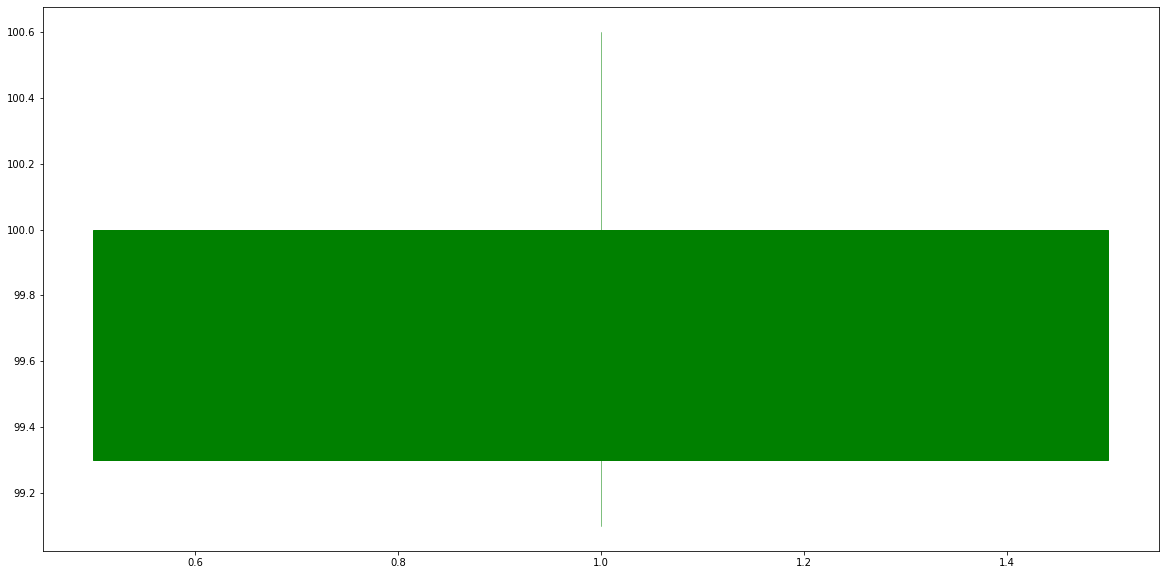

In [1175]:
fig, ax = plt.subplots(figsize=(20, 10))
candlestick_K(ax, five_minute_kbar, width = 1)

#### Fifteen minutes kbar

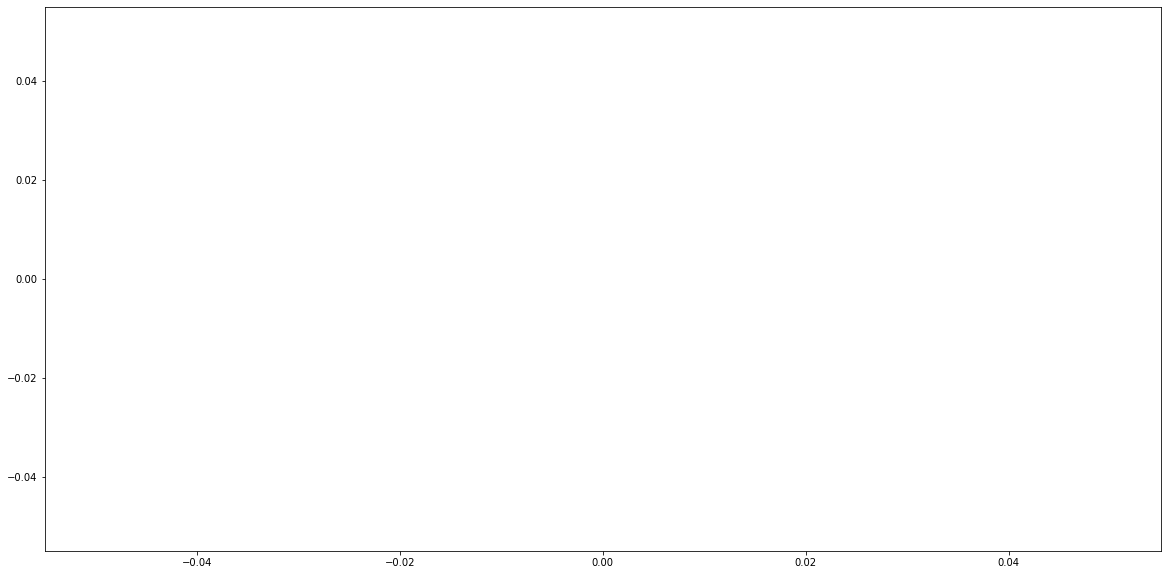

In [1176]:
fig, ax = plt.subplots(figsize=(20, 10))
candlestick_K(ax, fifteen_minute_kbar, width = 1)

### Five price

In [1258]:
for pv in tsmc['price_volume']:
    pv = sorted(pv.items(), key=lambda x: float(x[0]), reverse = True)
    prices = [item[0] for item in pv]
    volume = [item[1] for item in pv]
    clear_output(wait=True)
    display.display(pd.DataFrame([prices, volume], index=['price', 'volume',]).T)
    time.sleep(0.1)

,price,volume
0,100.7,30
1,100.6,524
2,100.5,683
3,100.4,867
4,100.3,953
5,100.2,1444
6,100.1,3342
7,100.0,3336
8,99.9,2905
9,99.8,1697


KeyboardInterrupt: 

In [1259]:
for bids, asks in zip(tsmc['bid_five_price'], tsmc['ask_five_price']):
    length = min(len(bids), len(asks))
    bid_prices = list(bids.keys())
    bid_volumes = list(bids.values())
    ask_prices = list(asks.keys())
    ask_volumes = list(asks.values())
    clear_output(wait=True)
    display.display(pd.DataFrame([bid_prices, bid_volumes, ask_prices, ask_volumes], index=['bid_price', 'bid_volumn', 'ask_price', 'ask_volumn']).T)
    time.sleep(0.5)

,bid_price,bid_volumn,ask_price,ask_volumn
0,99.7,193,99.9,90
1,99.6,2025,100.0,2023
2,99.5,1919,100.1,3465
3,99.4,2077,100.2,2419
4,99.3,1937,100.3,2586


KeyboardInterrupt: 

### Volume

In [1179]:
tsmc['volume']

0       62
1       46
2       67
3       55
4       53
      ... 
319    103
320     30
321     44
322    250
323     78
Name: volume, Length: 324, dtype: int64

## Agent

In [1180]:
agent = pd.read_json(agent_path)
group_names = agent.columns
num_of_timesteps = len(agent[group_names[0]]['cash'])
print(group_names)
print(agent[agent.columns[0]].index)

Index(['zi_1000', 'tr_sma_100', 'tr_ema_100', 'tr_macd_100', 'mr_sma_100',
       'mr_ema_100', 'mr_macd_100', 'fu_100', 'dh_1'],
      dtype='object')
Index(['cash', 'TSMC', 'wealth', 'average_cost', 'group_bids_volume',
       'group_asks_volume', 'initial_wealth_by_agent', 'initial_cash_by_agent',
       'initial_security_by_agent', 'returns_by_agent', 'WEALTH',
       'returns_by_step', 'timestep_bid', 'timestep_ask'],
      dtype='object')


In [1181]:
# normalize 
wealth = np.array([agent[group_name]['wealth'] for group_name in group_names])
std_wealth = (wealth - wealth[:, 0].reshape(-1, 1)) / wealth[:, 0].reshape(-1, 1)


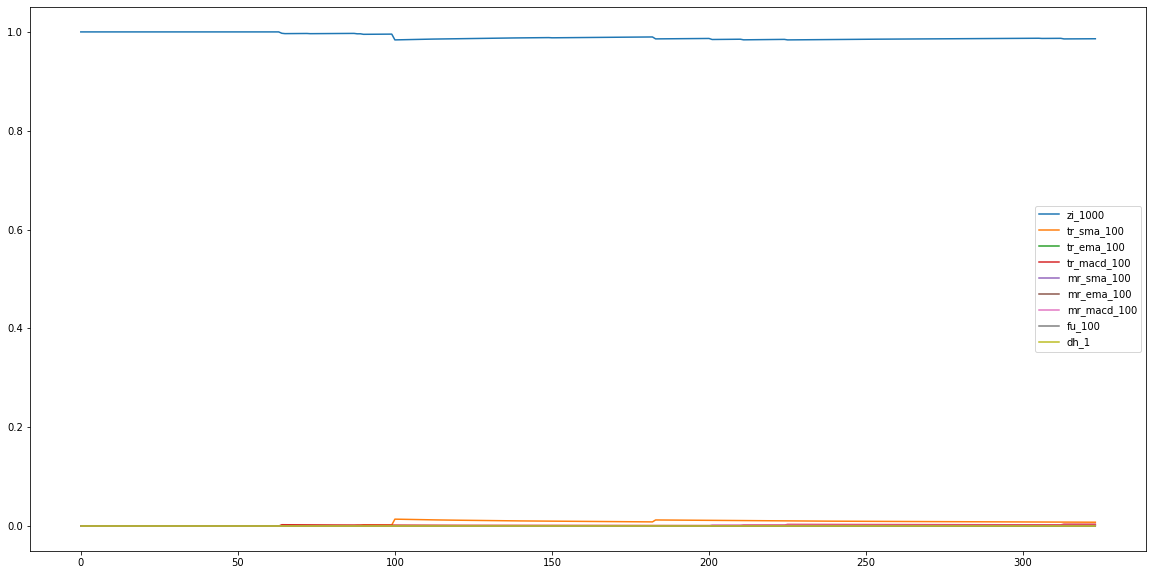

In [1246]:
group_bids_volume = [agent.loc['group_bids_volume', group_name] for group_name in group_names]
group_bids_volume = np.array(group_bids_volume).T
group_bids_volume = group_bids_volume / group_bids_volume.sum(axis = 1).reshape(-1, 1)
for i in range(len(group_names)):
#     if group_names[i] == 'zi_1000':
#         continue
    plt.plot(group_bids_volume[:, i], label = group_names[i])
# plt.ylim(0, 0.1)
plt.legend()

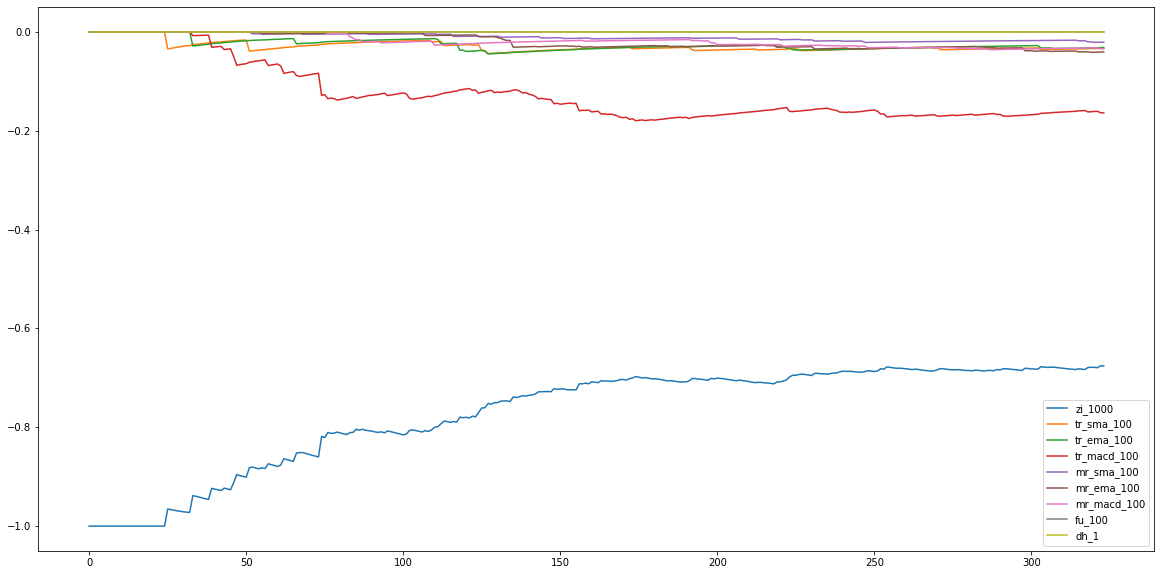

In [1247]:
group_asks_volume = [agent.loc['group_asks_volume', group_name] for group_name in group_names]
group_asks_volume = np.array(group_asks_volume).T
group_asks_volume = group_asks_volume / group_asks_volume.sum(axis = 1).reshape(-1, 1)
for i in range(len(group_names)):
#     if group_names[i] == 'zi_1000':
#         continue
    plt.plot(-1 * group_asks_volume[:, i], label = group_names[i])

# plt.ylim(-0.3, 0.2)
plt.legend()

### Initial state

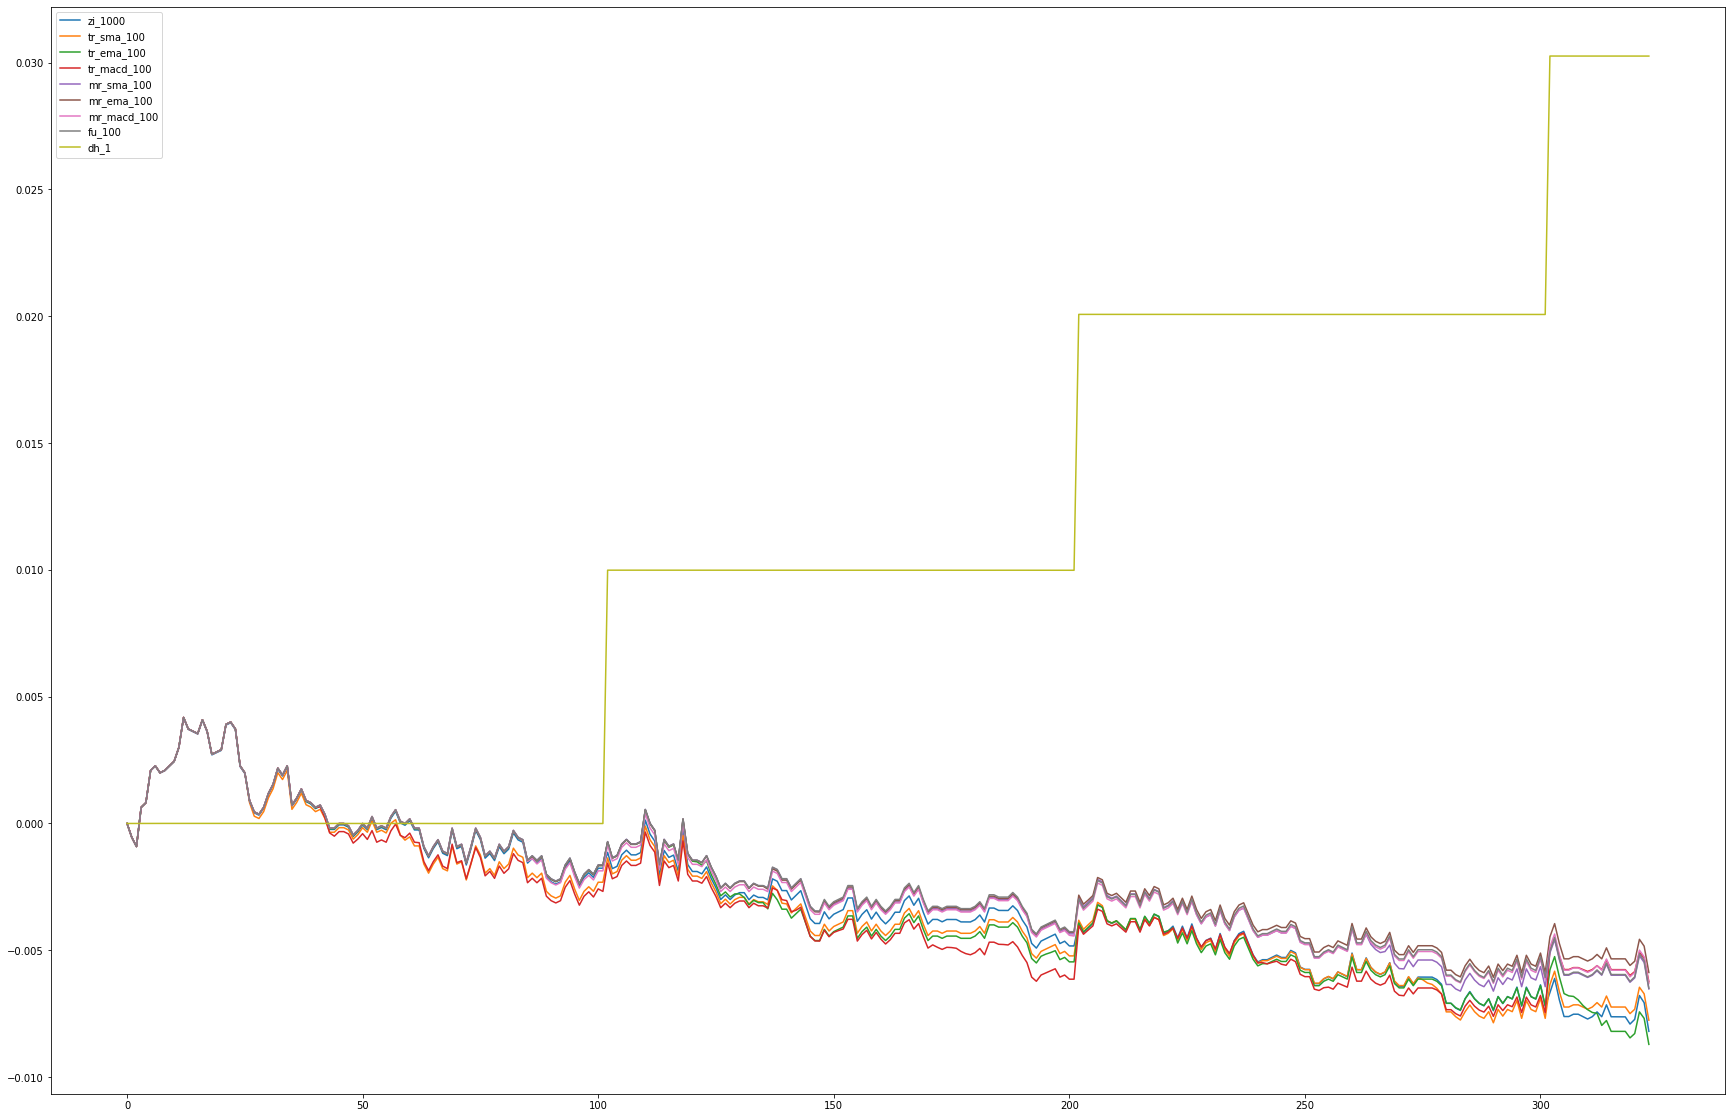

In [1182]:
plt.figure(figsize=(30, 20))
for i, group_name in enumerate(agent.columns):
    plt.plot(std_wealth[i], label = group_names[i])
plt.legend()

### Wealth

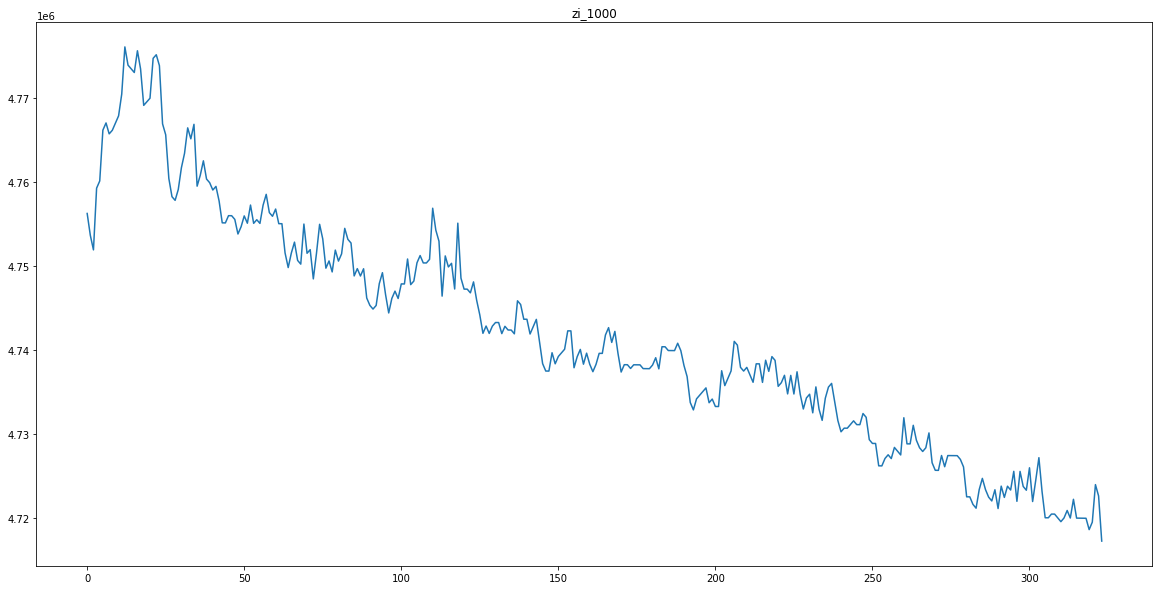

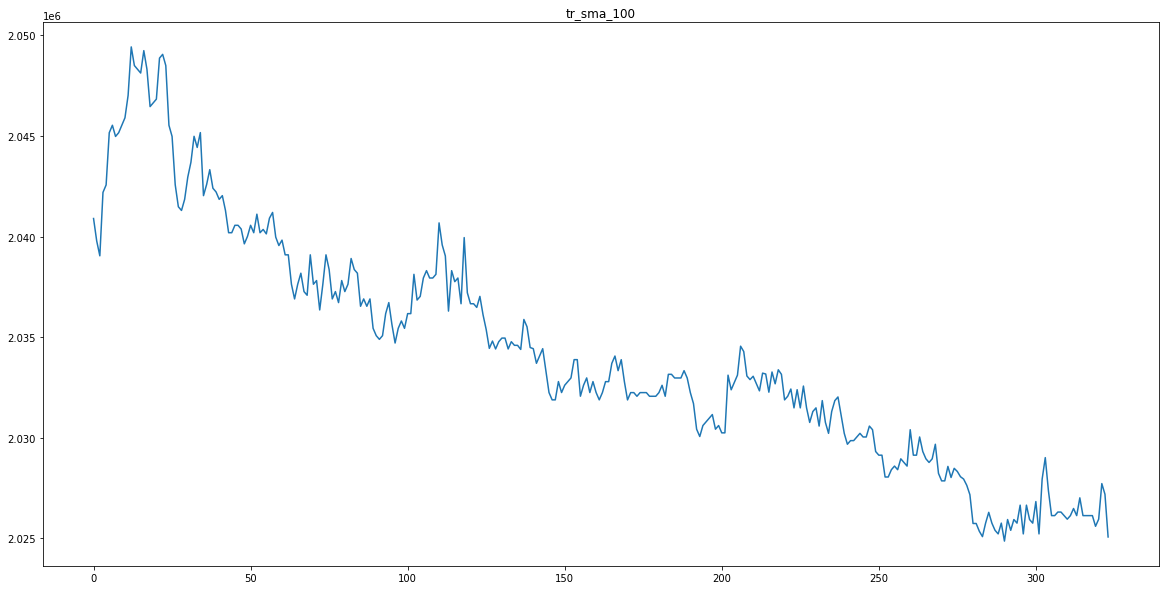

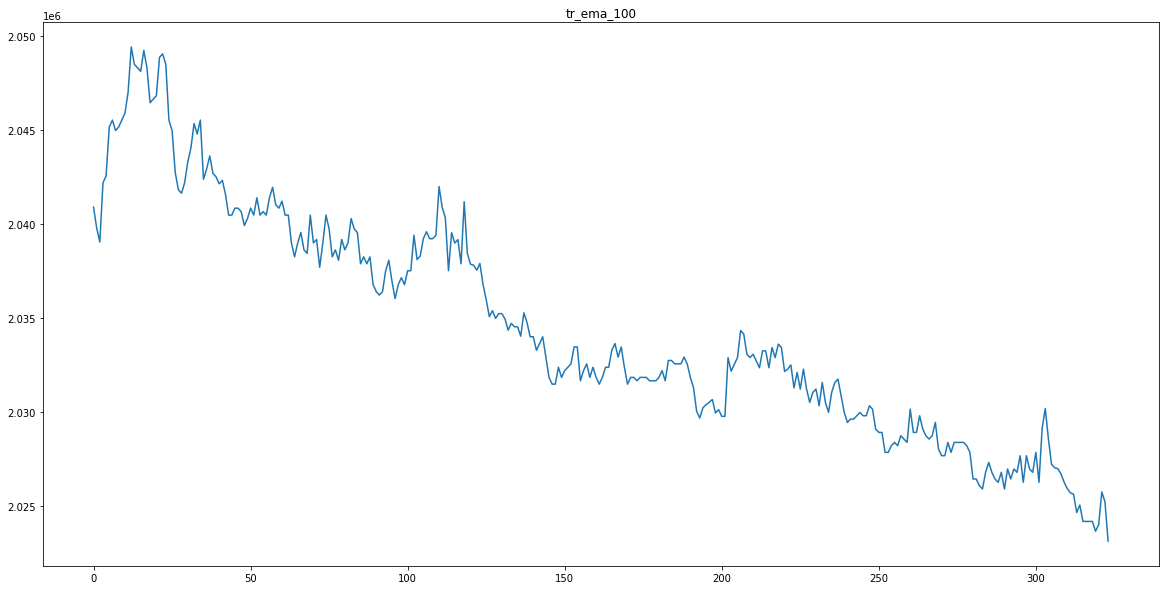

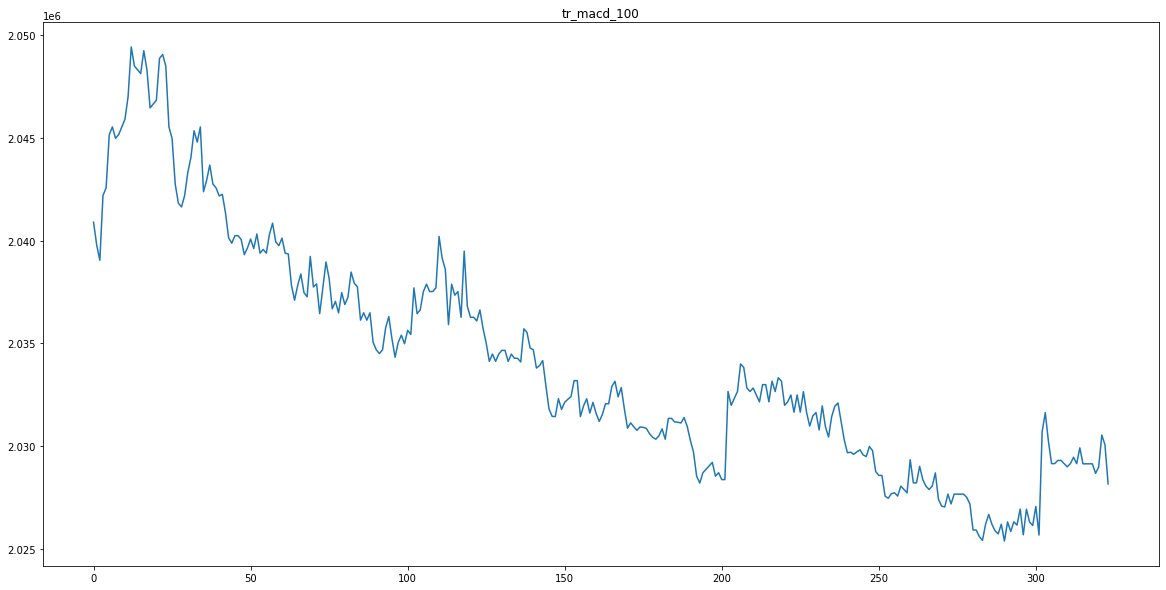

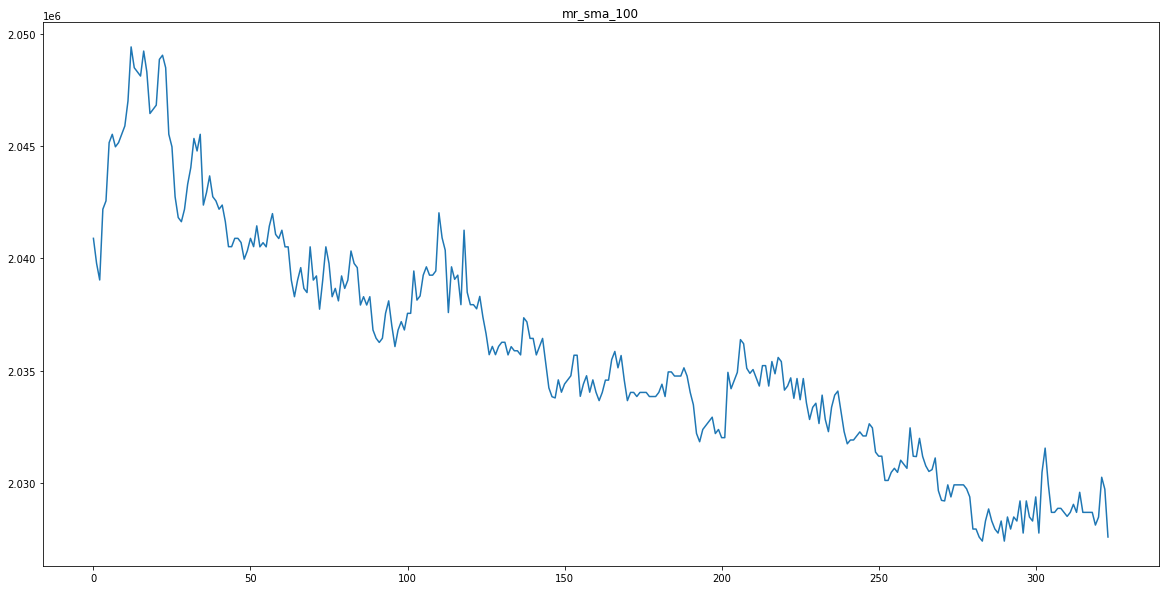

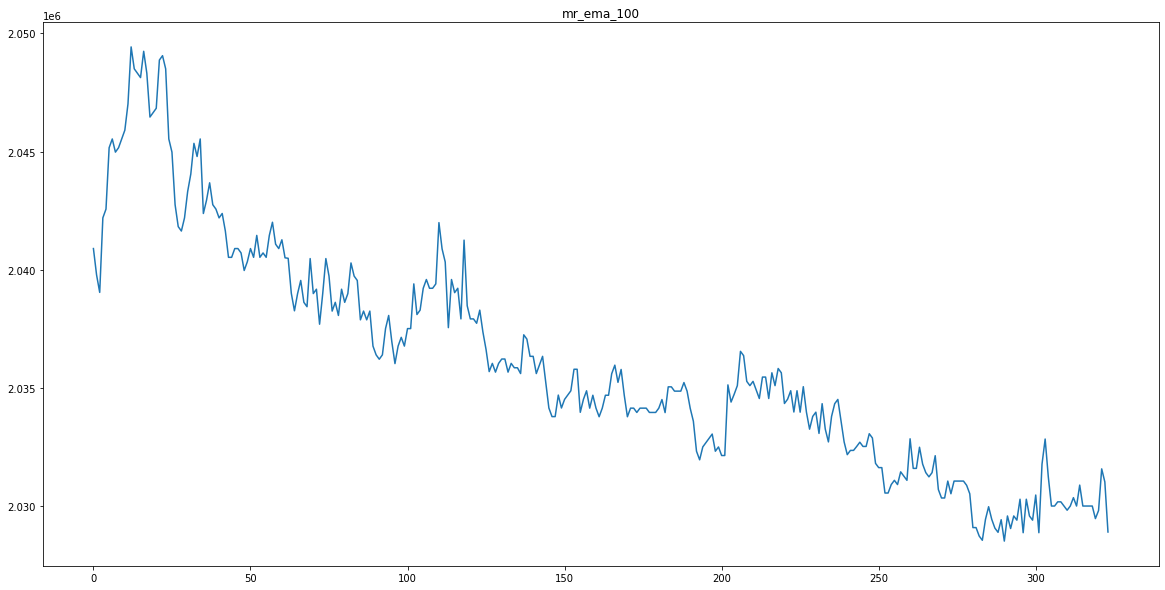

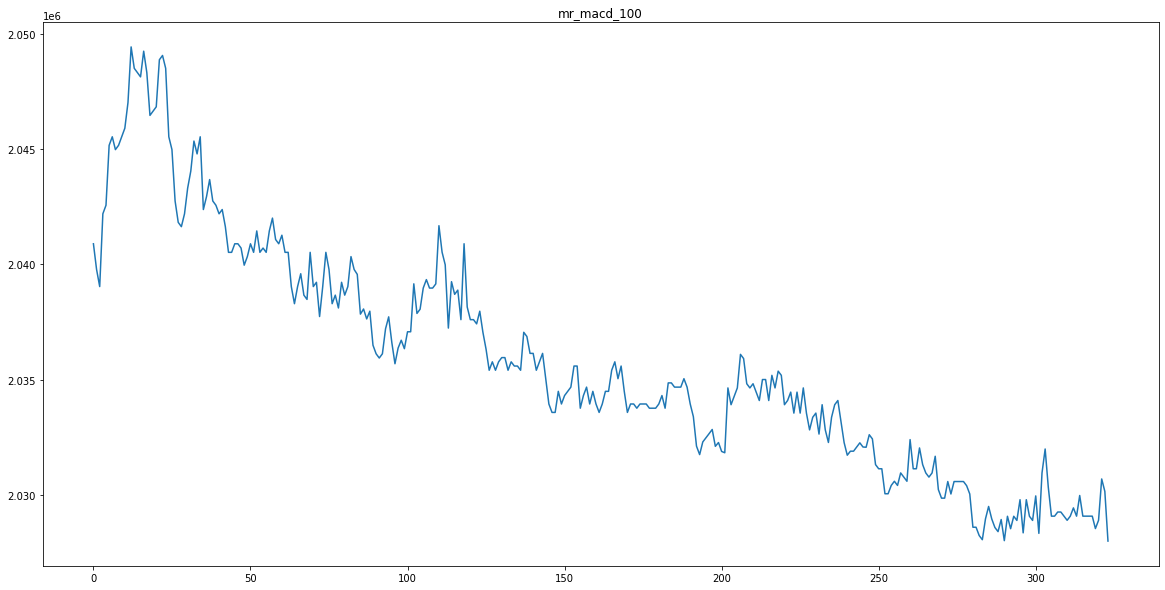

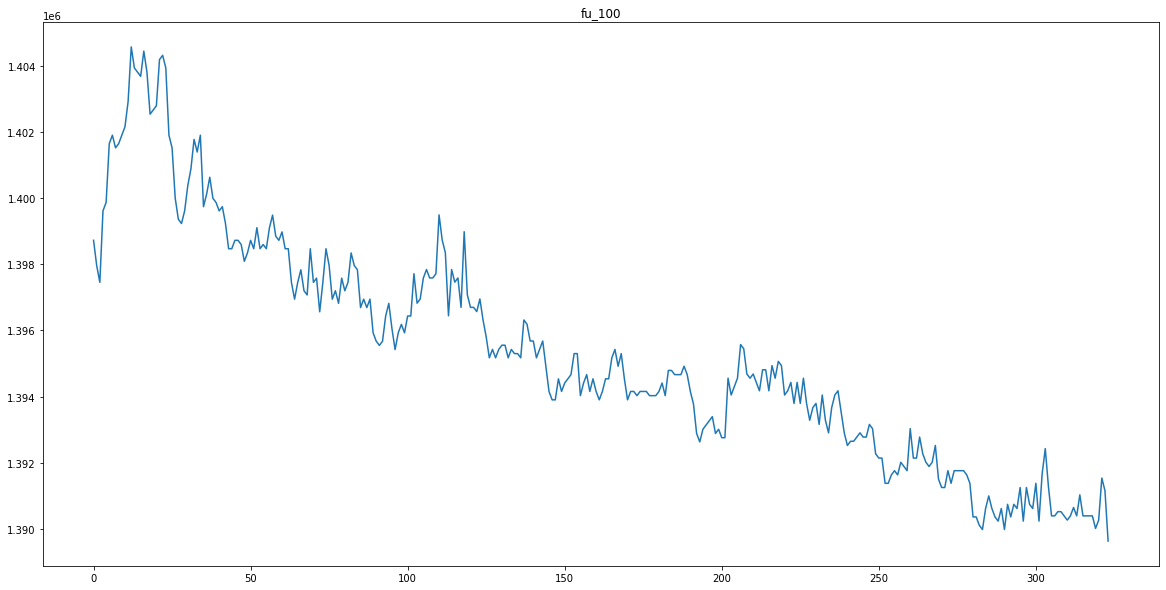

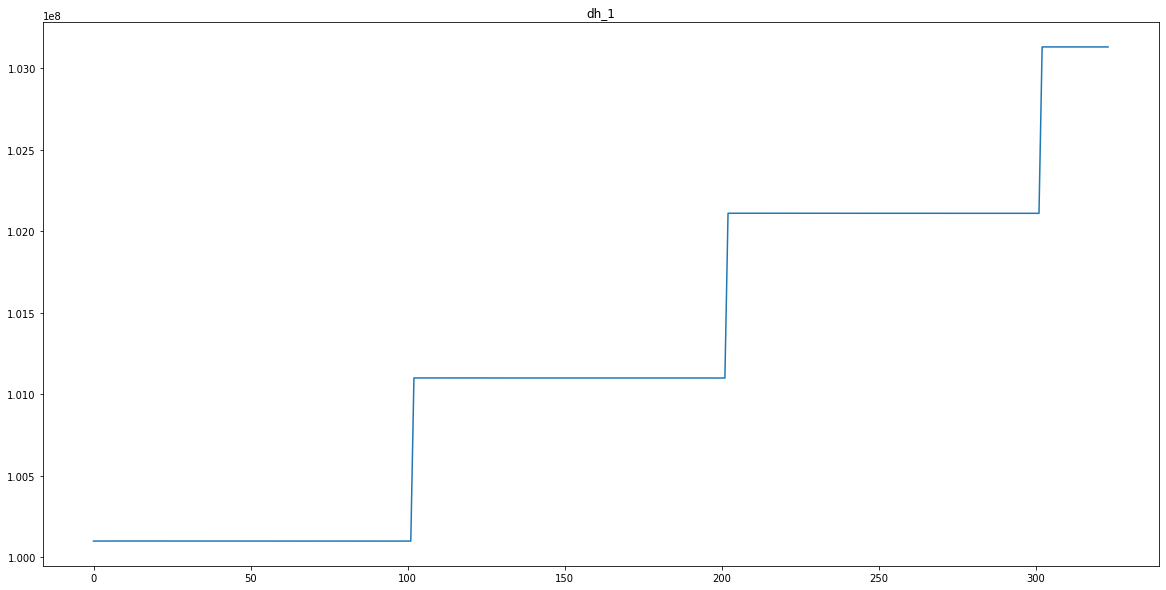

In [1183]:
# for agent_type in agent.columns:
for group_name in agent.columns:
    plt.figure(figsize=(20, 10))
    plt.plot(agent[group_name]['wealth'])
    plt.title(group_name)
    plt.show()
# for i in range(len(agent.columns)):
#     plt.figure(figsize=(20, 10))
#     plt.plot(agent.iloc[:, i])
#     plt.title(agent.columns[i])
#     plt.show()

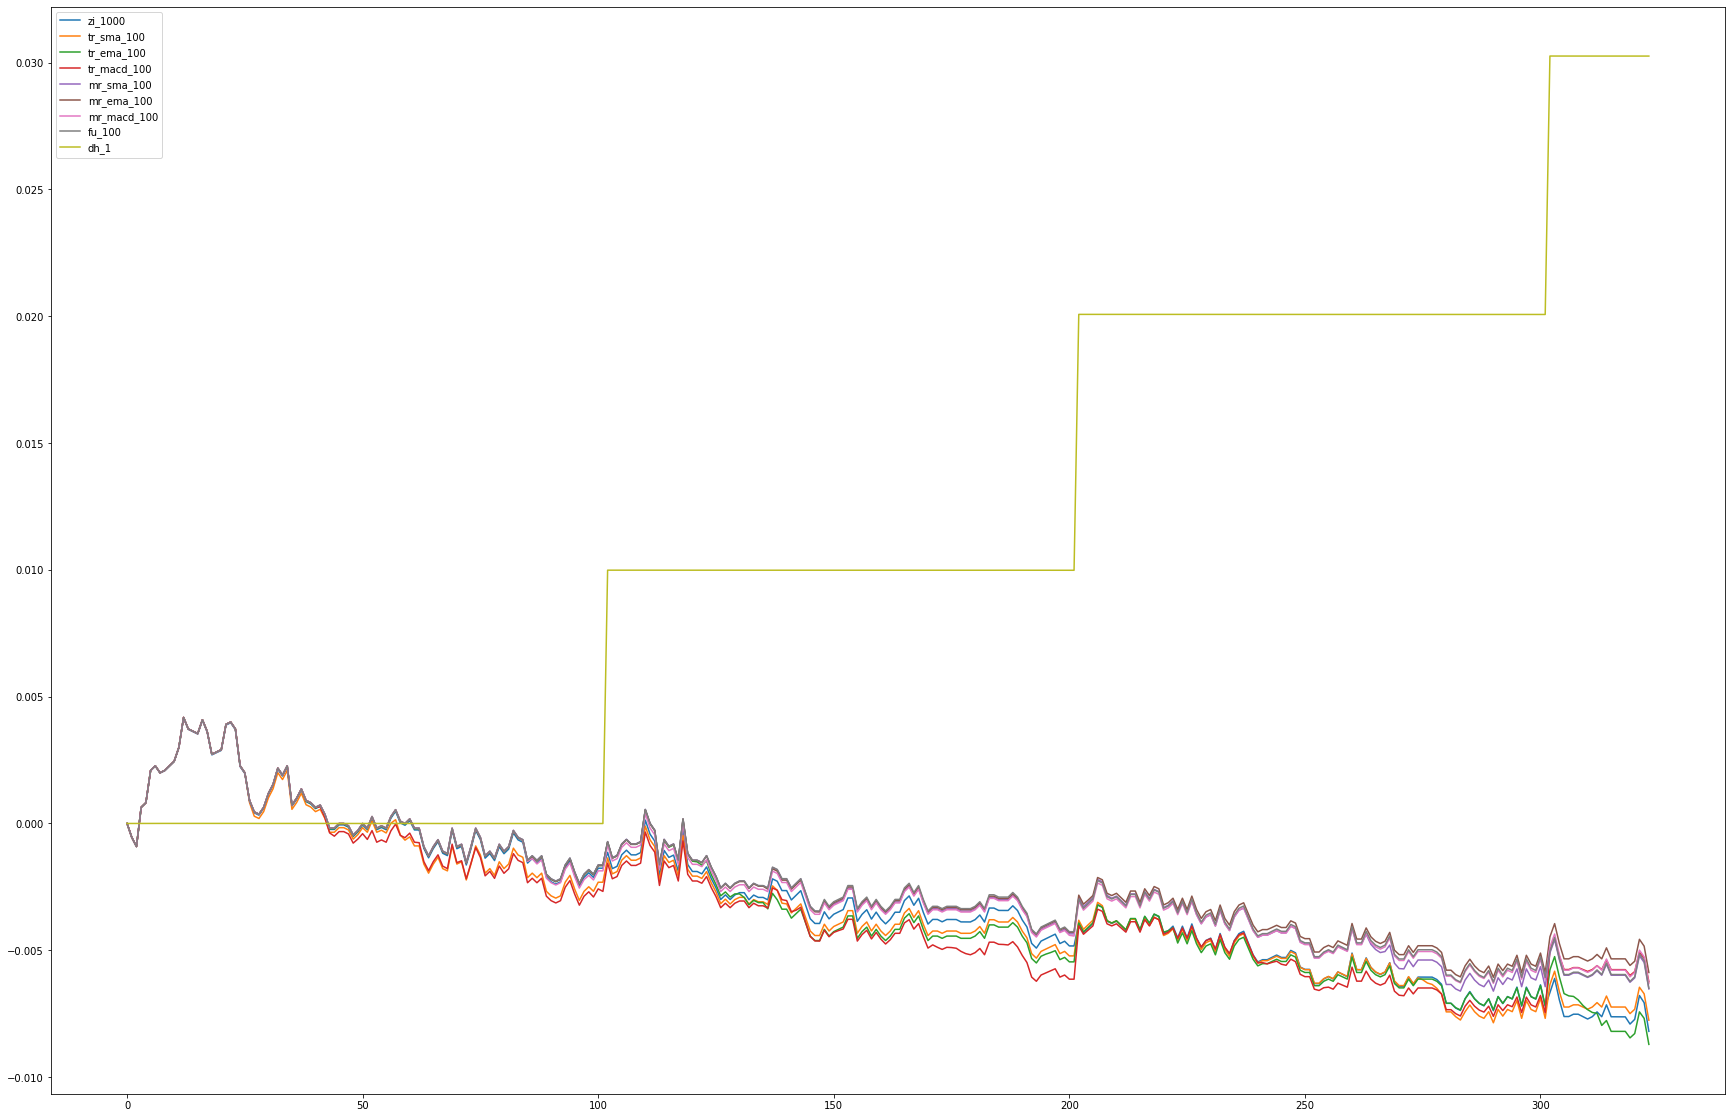

In [1184]:
plt.figure(figsize=(30, 20))
for i, group_name in enumerate(agent.columns):
    plt.plot(std_wealth[i], label = group_names[i])
plt.legend()

### Cash

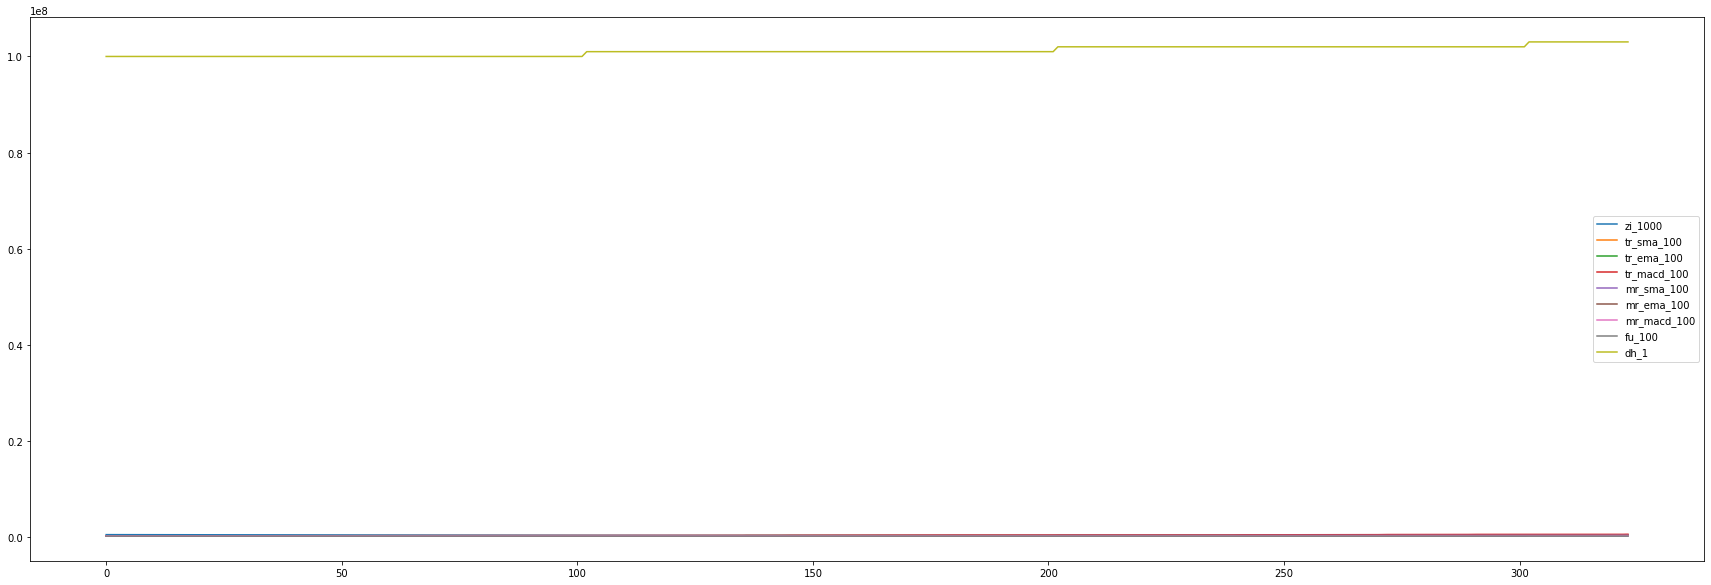

In [1185]:
plt.figure(figsize=(30, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['cash'], label = group_names[i])
plt.legend()

### Security

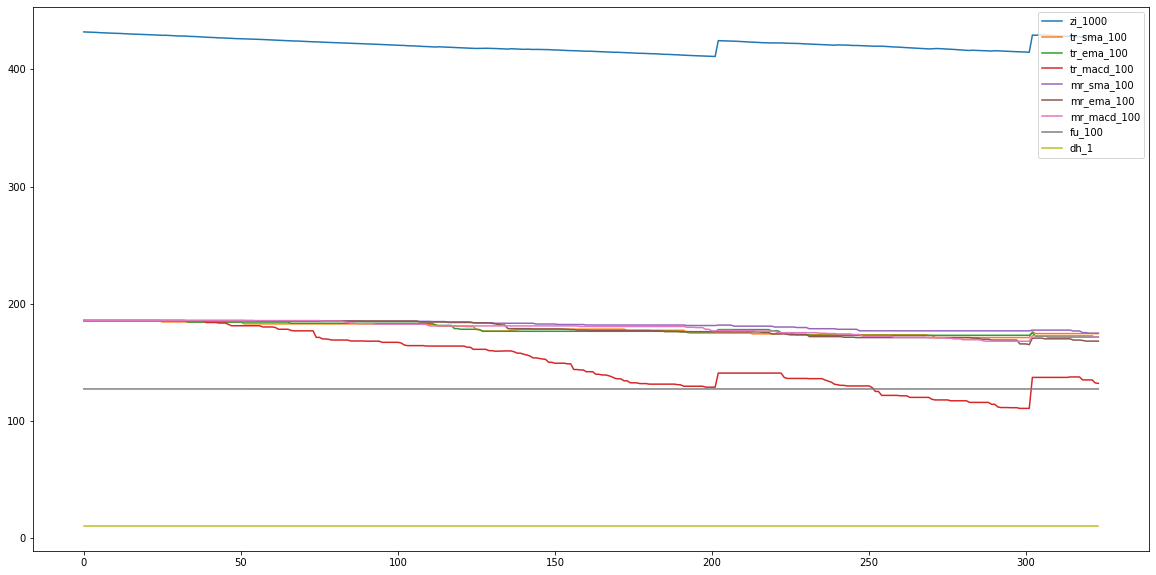

In [1186]:
plt.figure(figsize=(20, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['TSMC'], label = group_names[i])
plt.legend()

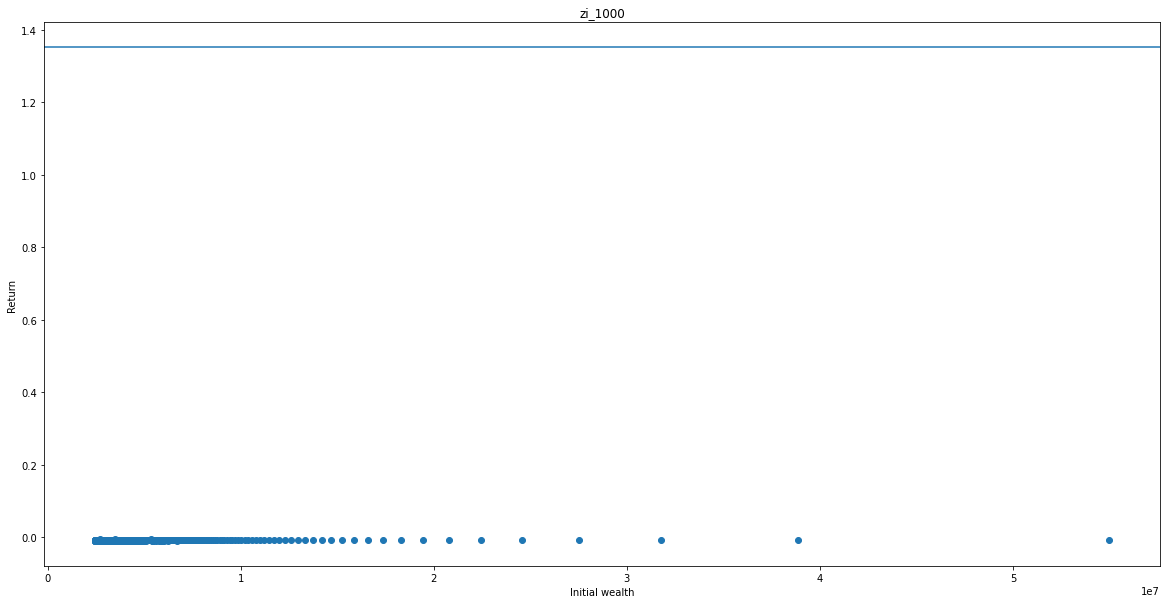

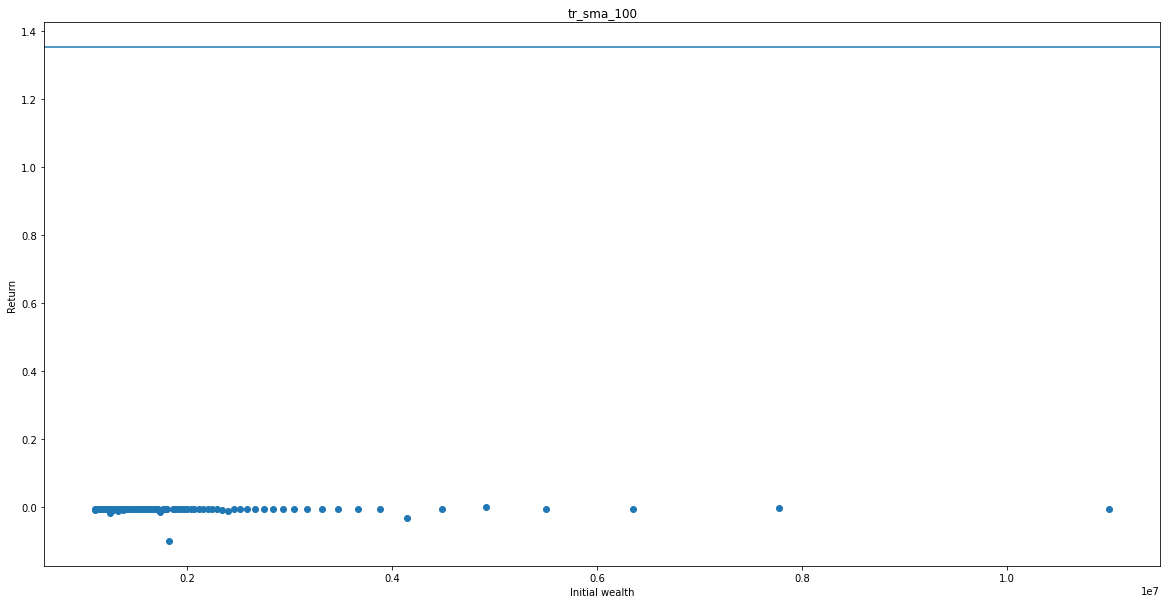

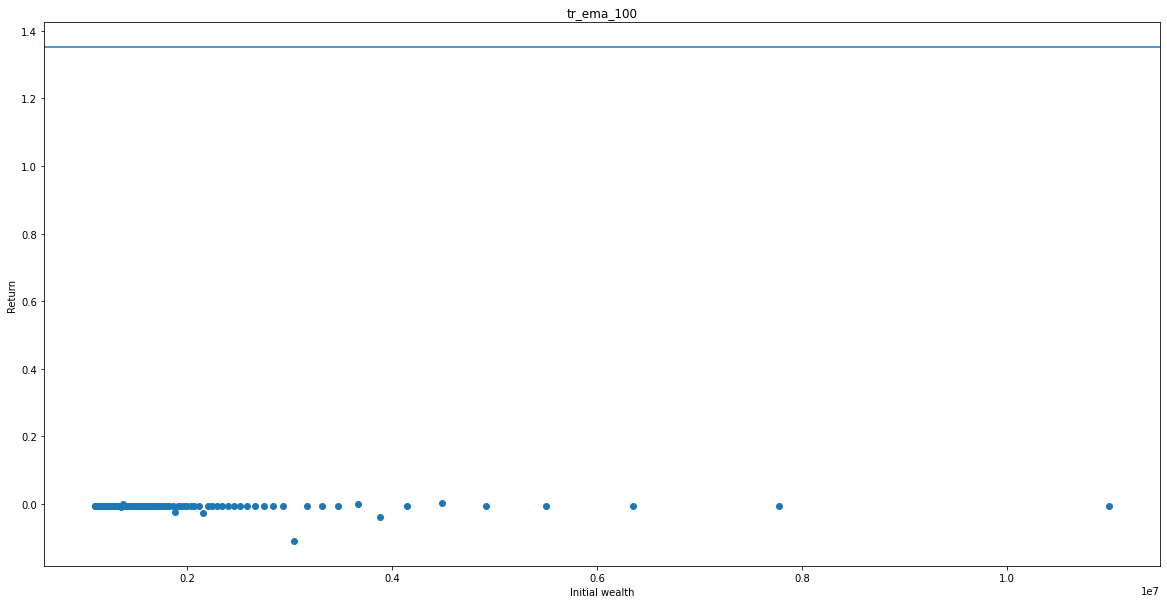

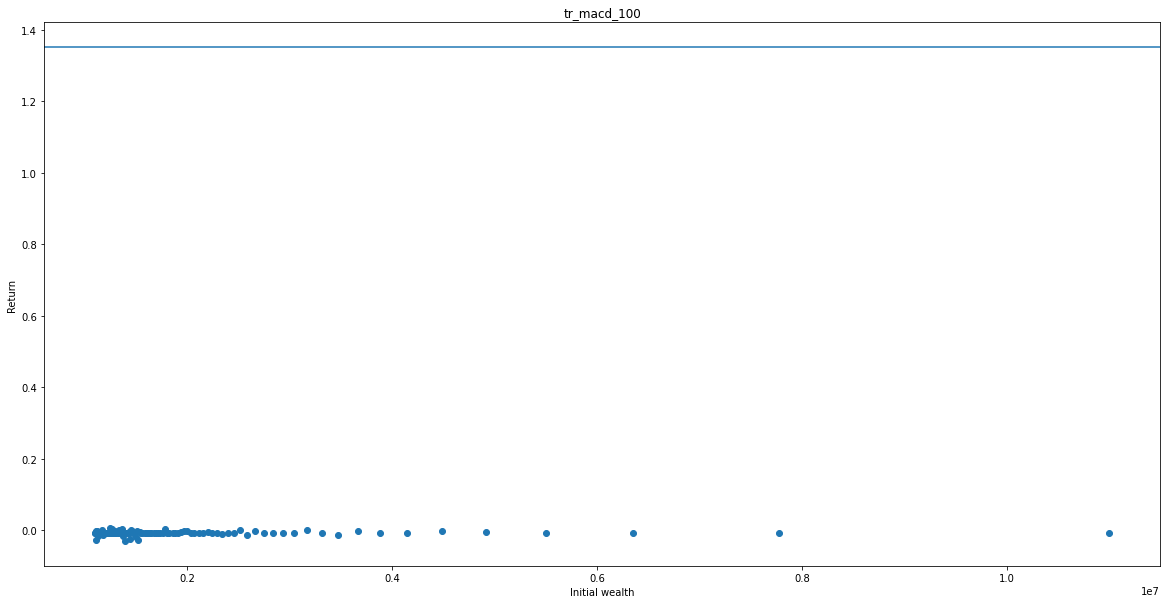

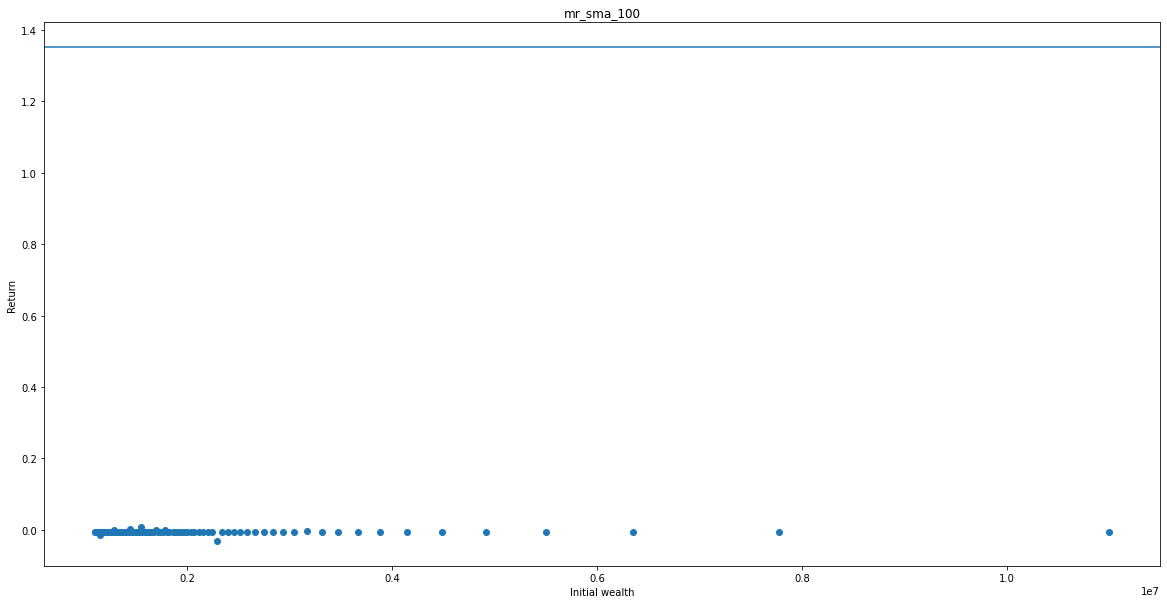

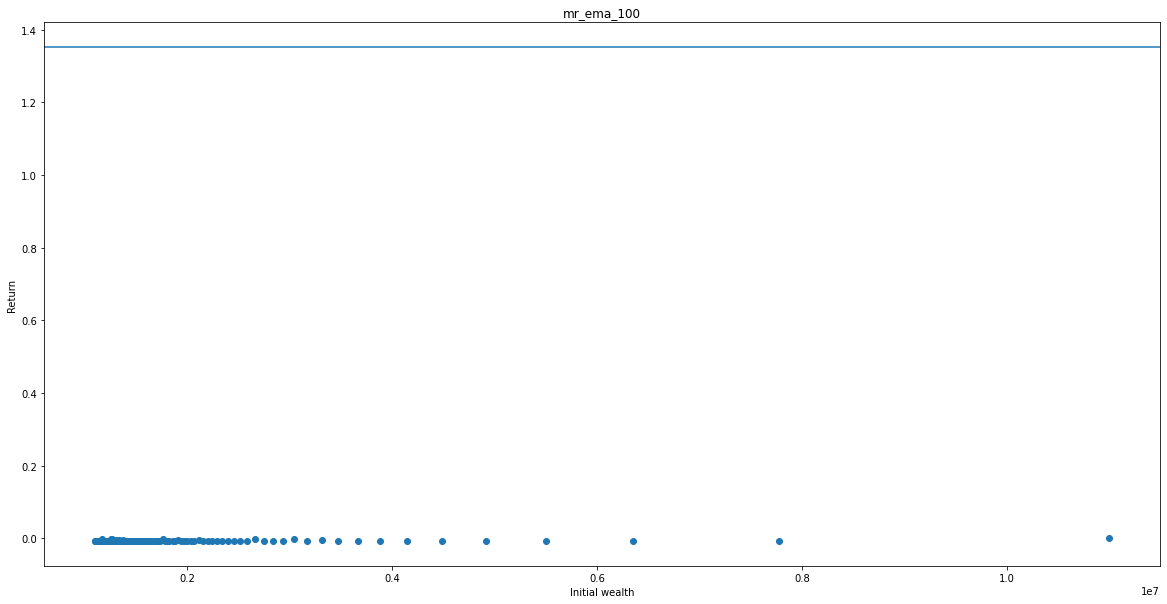

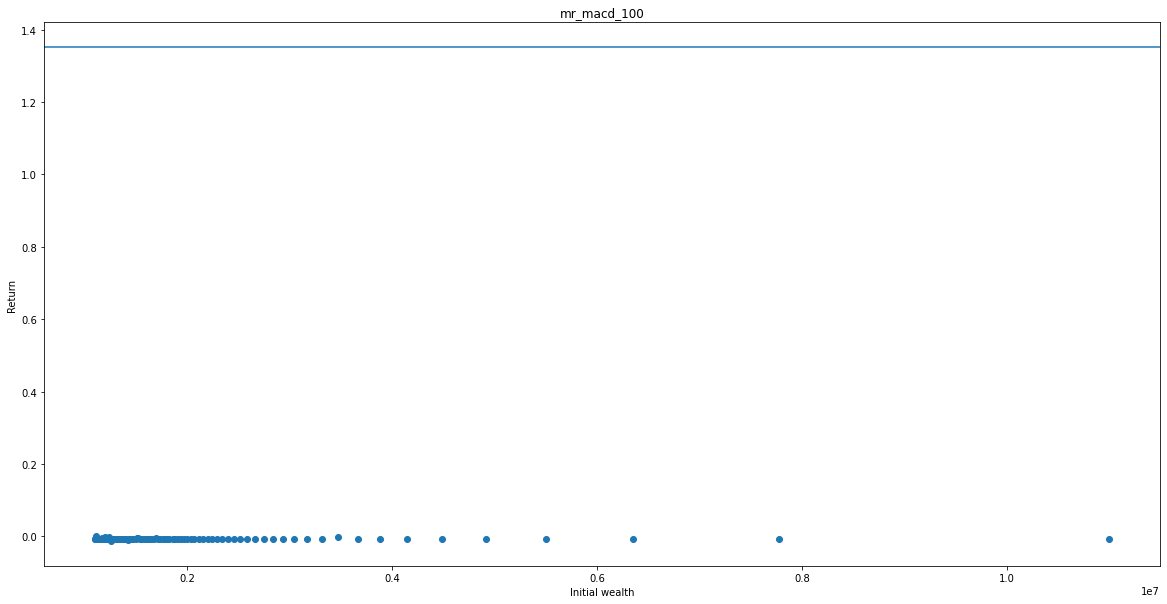

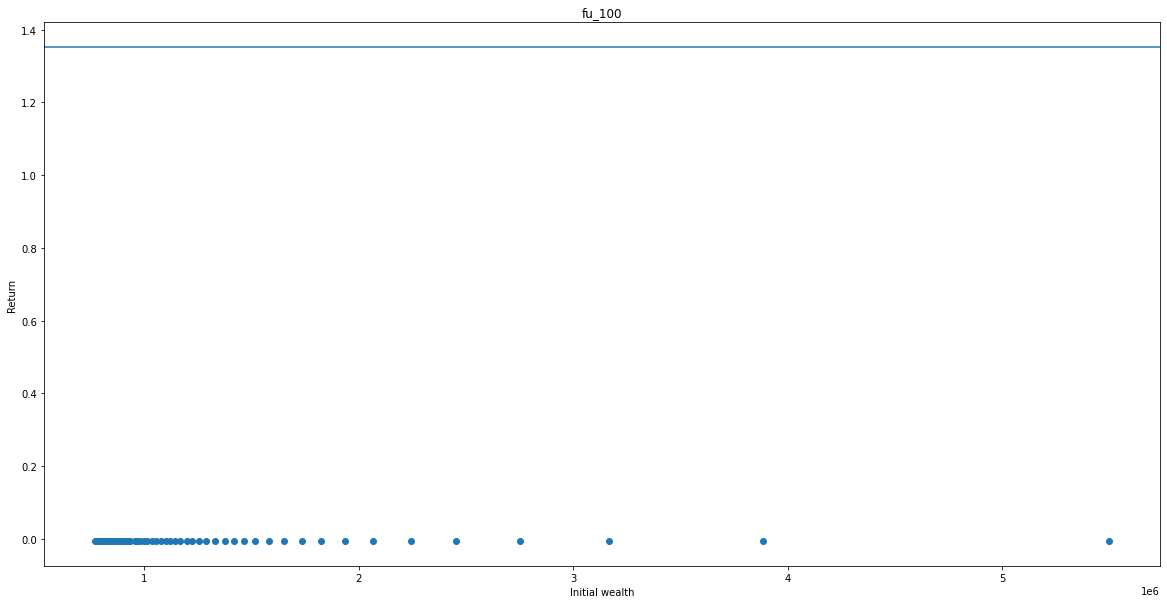

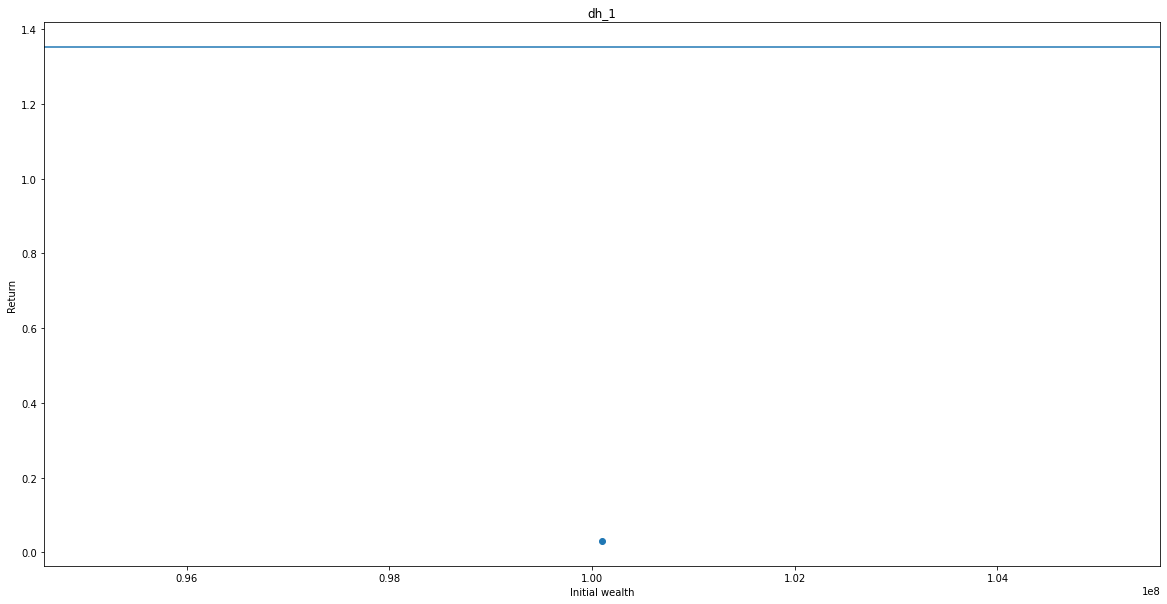

In [1187]:
baseline_return = pow(1.01, 100) / 2
for group_name in group_names:
    plt.figure(figsize=(20, 10))
    plt.axhline(y = baseline_return)
    plt.scatter(agent[group_name]['initial_wealth_by_agent'], np.array(agent[group_name]['returns_by_agent']))
    plt.xlabel('Initial wealth')
    plt.ylabel('Return')
    plt.title(f"{group_name}")
    plt.show()

### Average cost

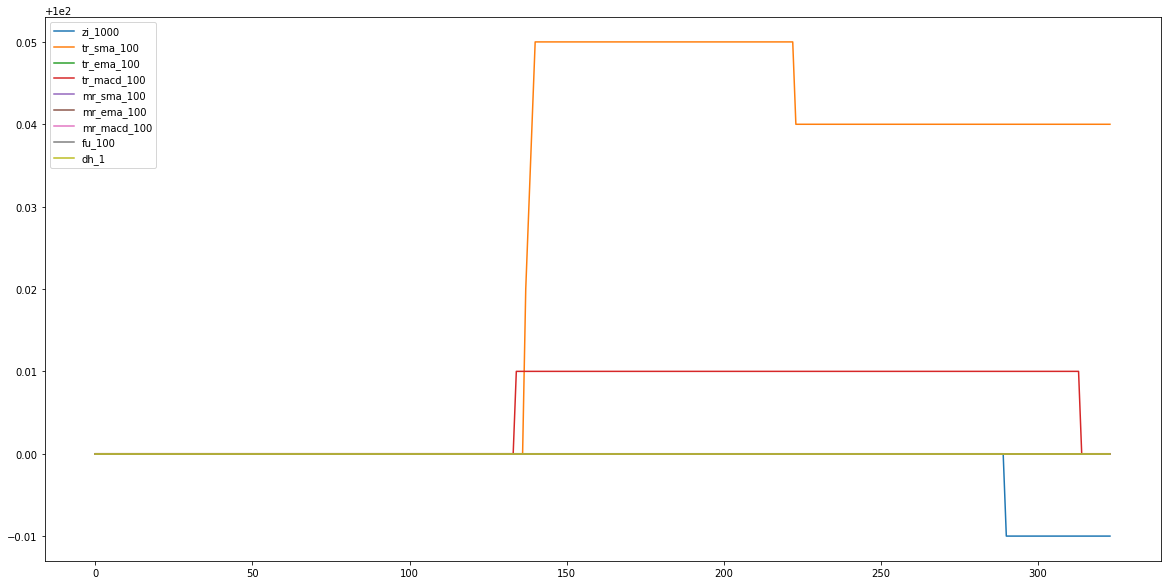

In [1188]:
plt.figure(figsize=(20, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['average_cost'], label = group_names[i])
plt.legend()

### Order distribution

/home/r08922183/.local/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


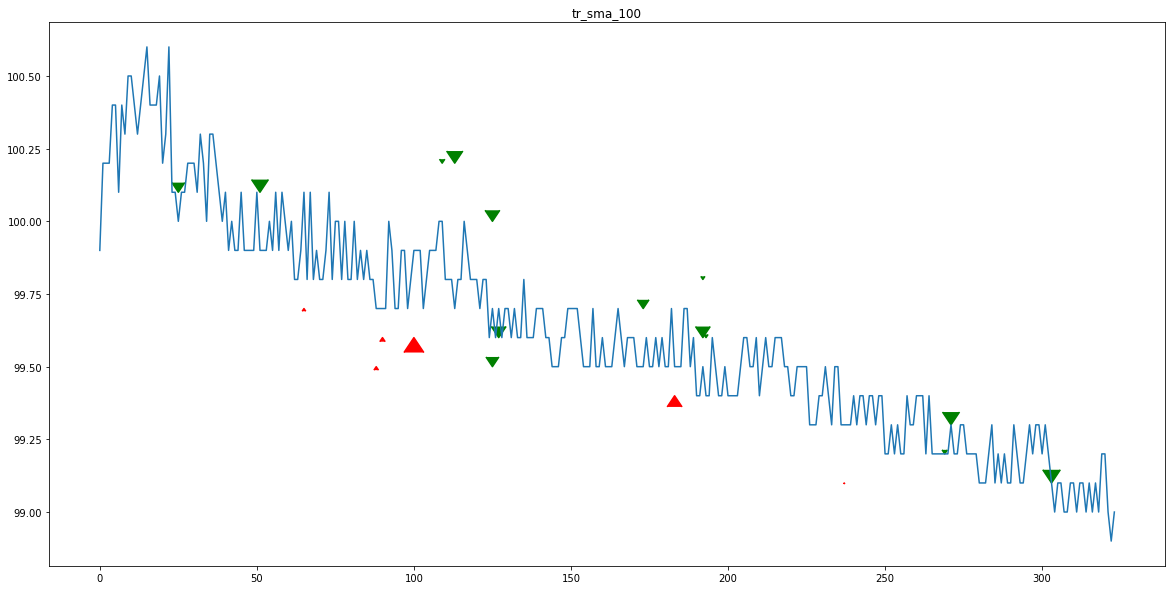

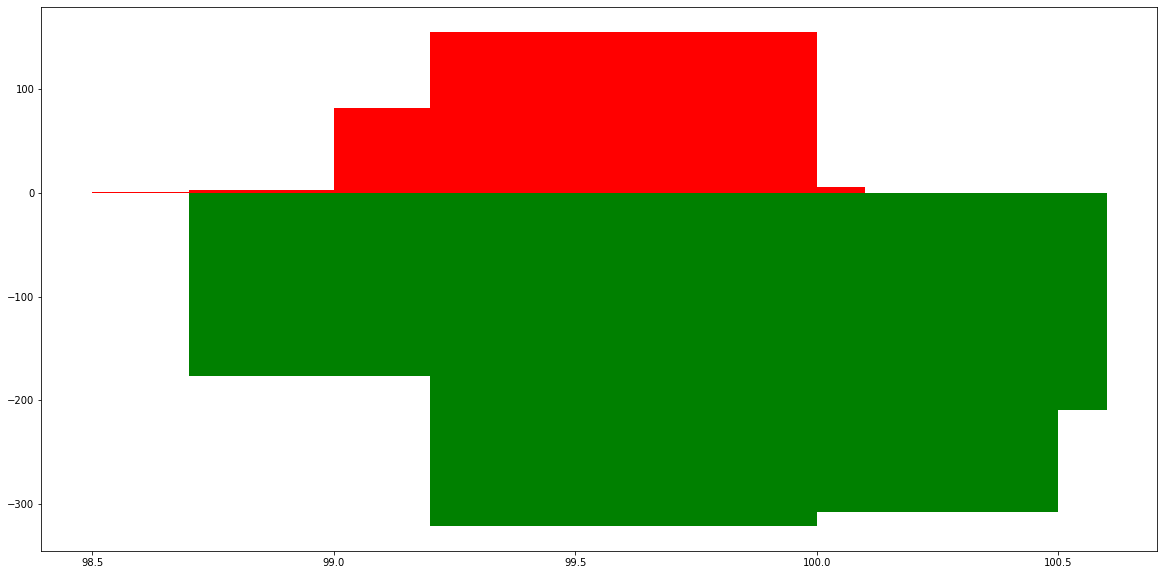

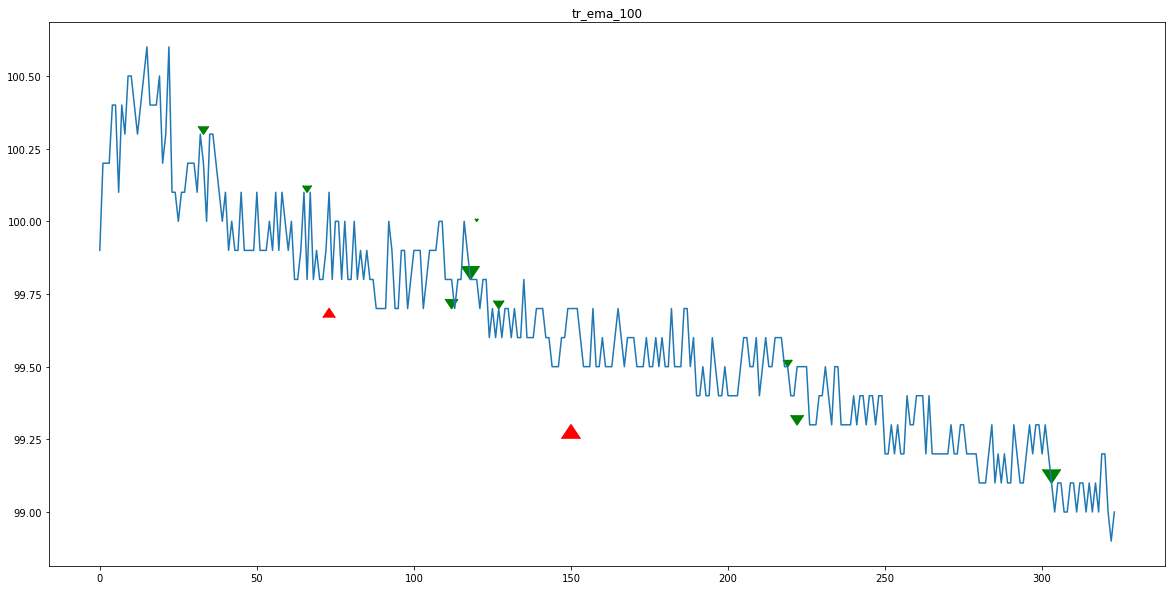

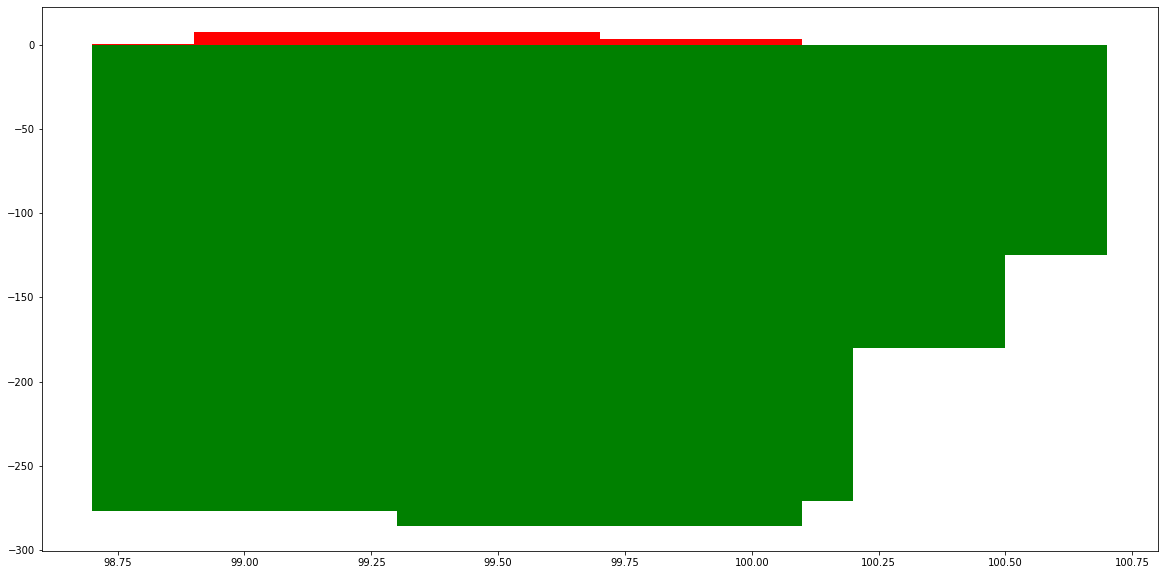

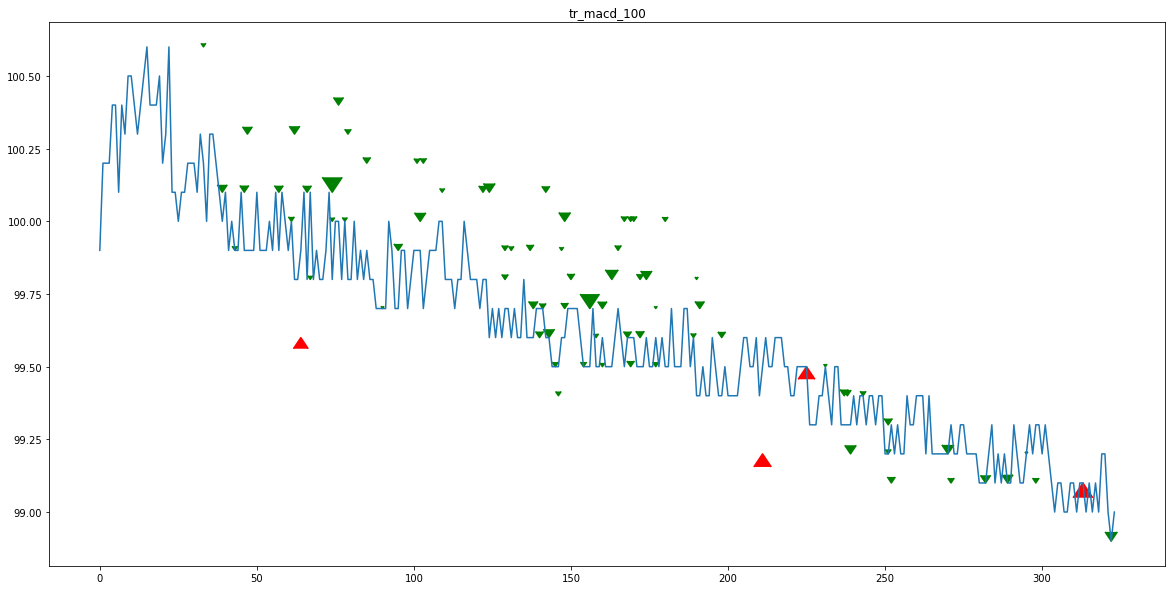

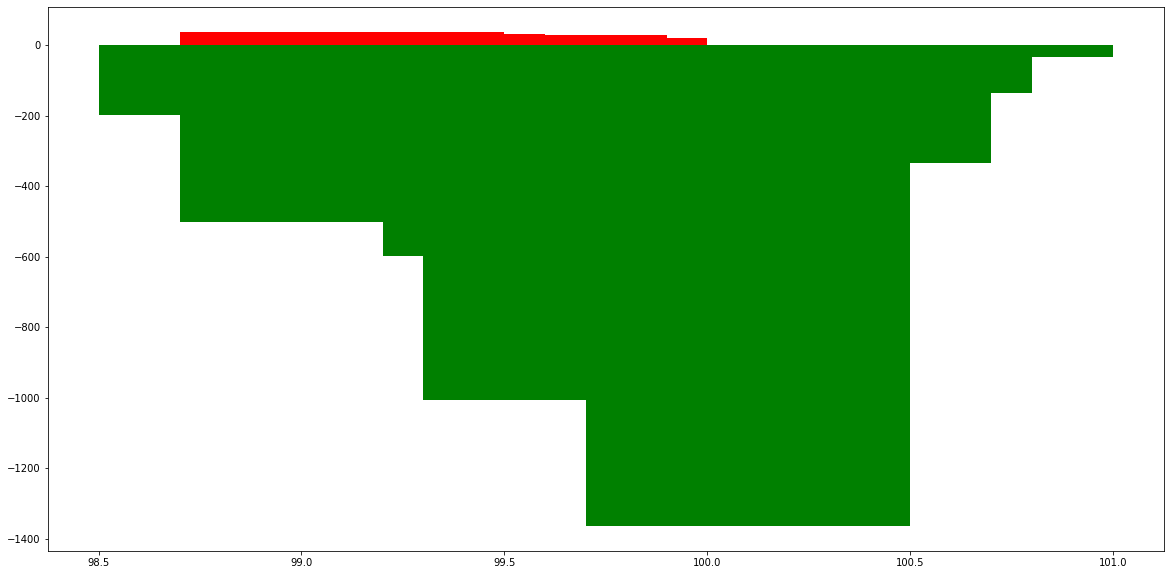

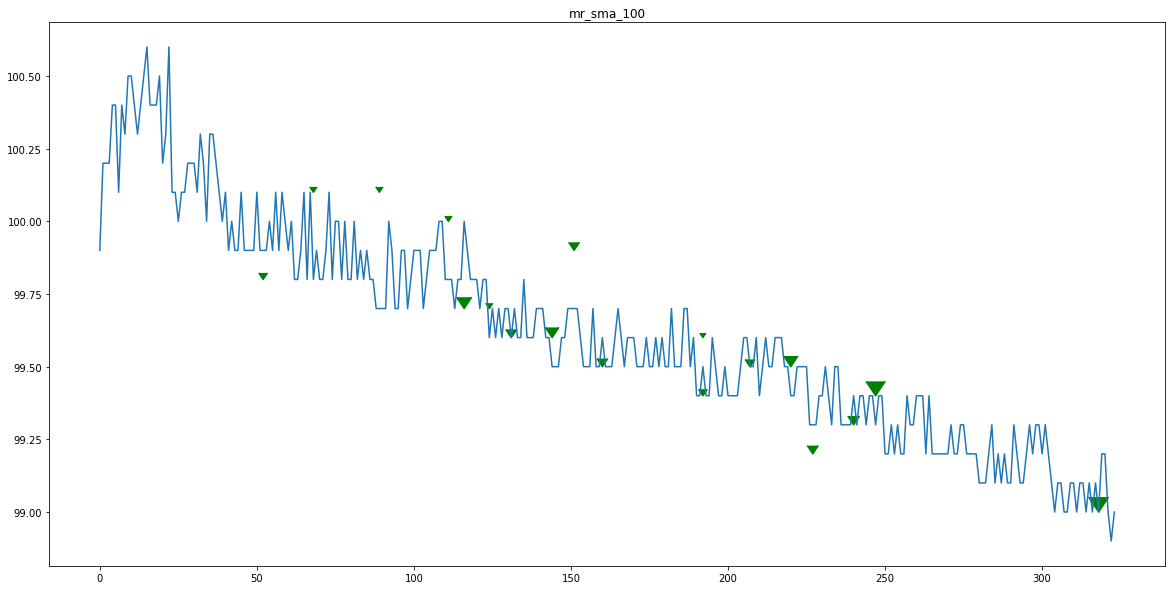

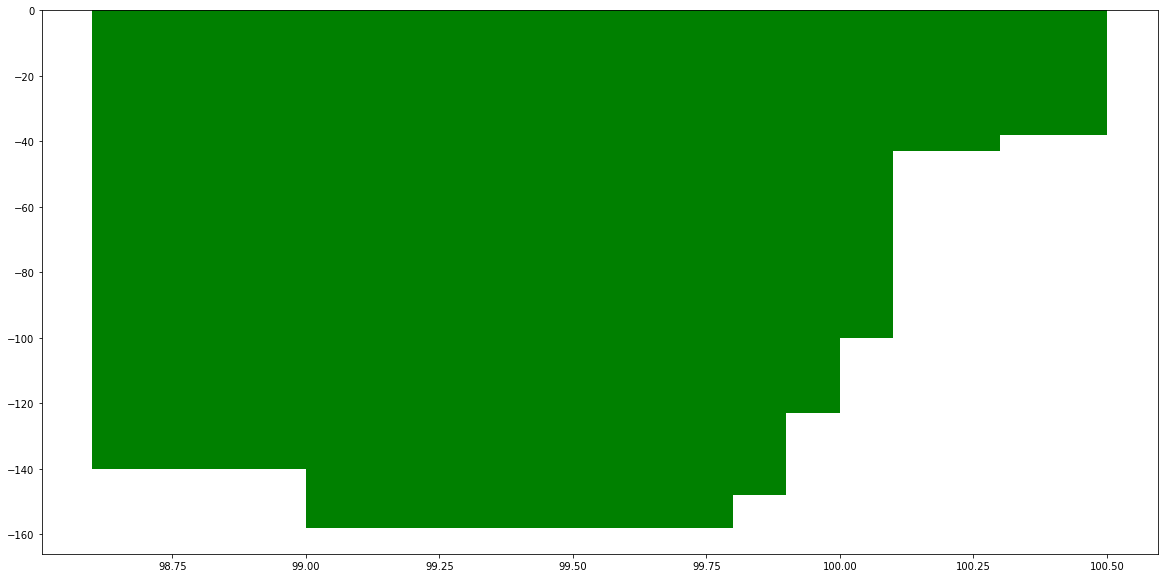

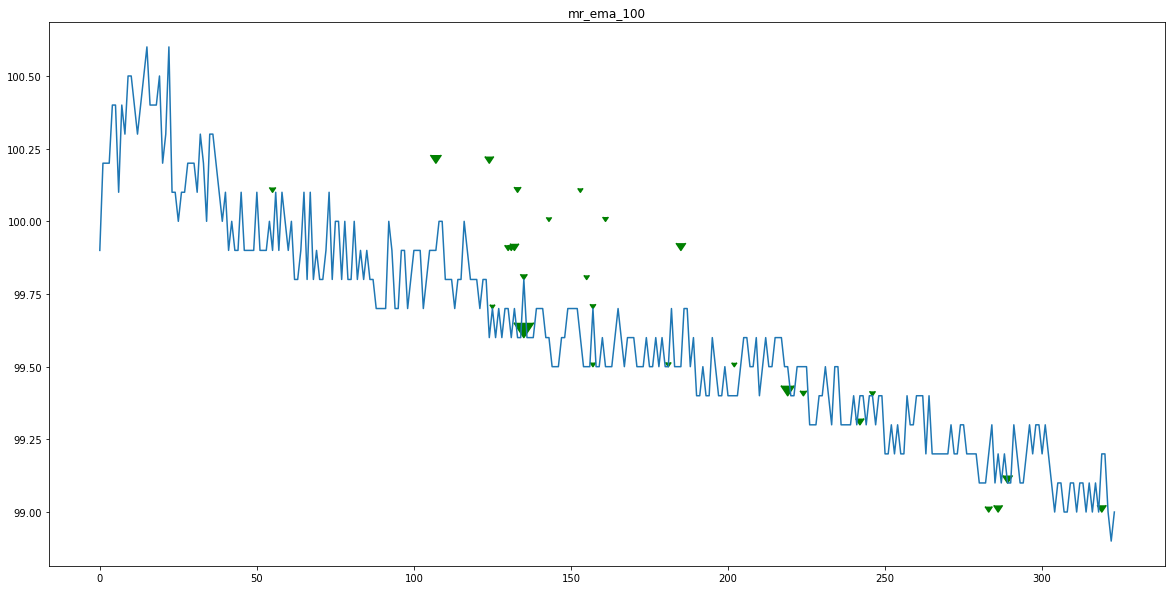

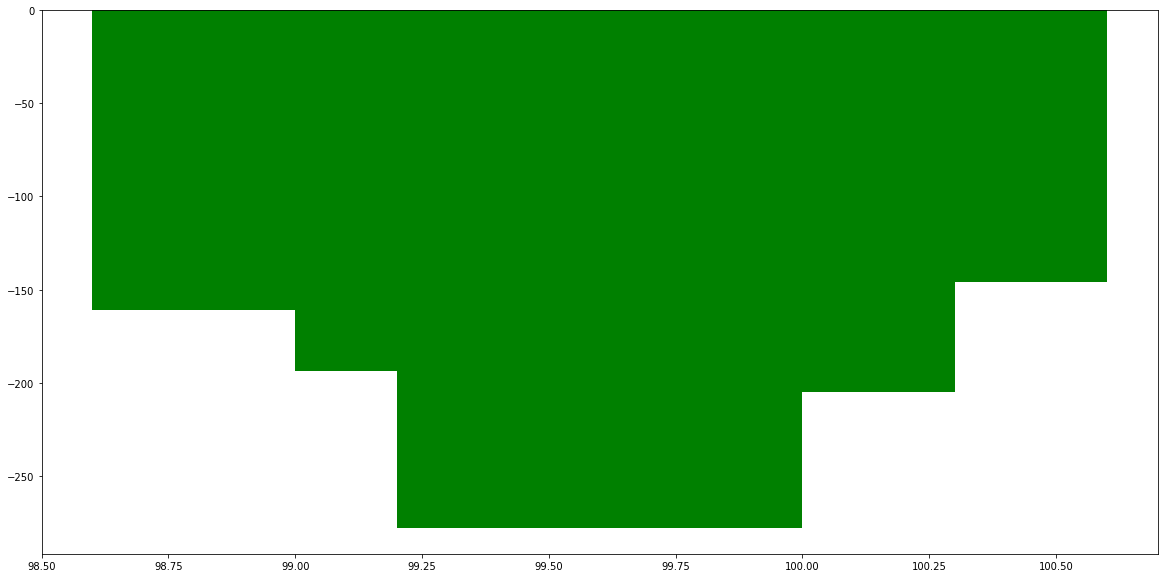

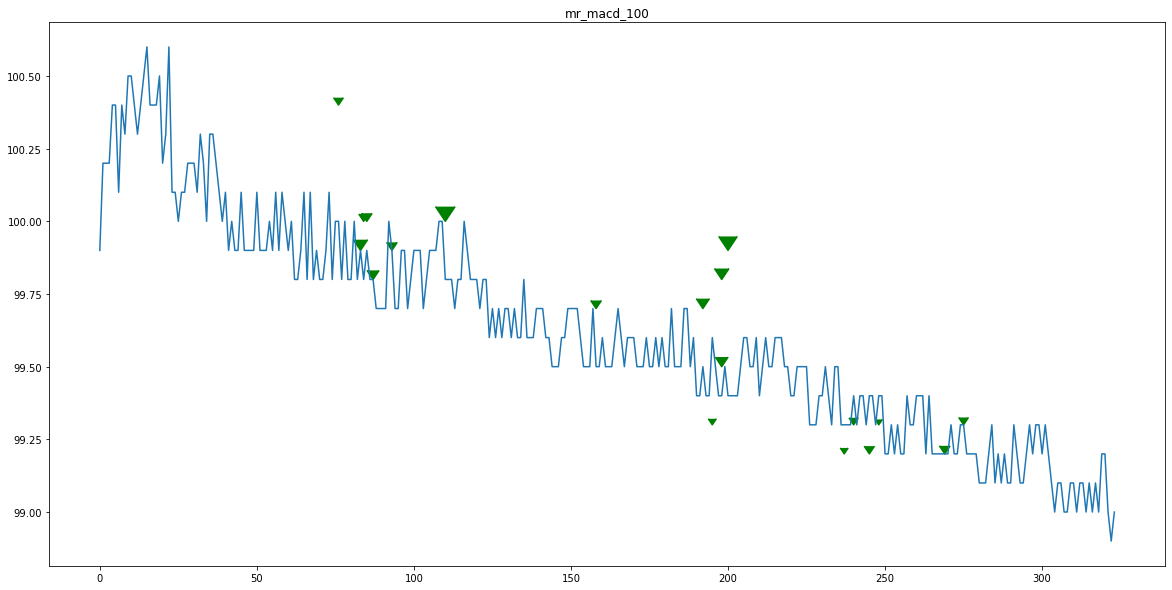

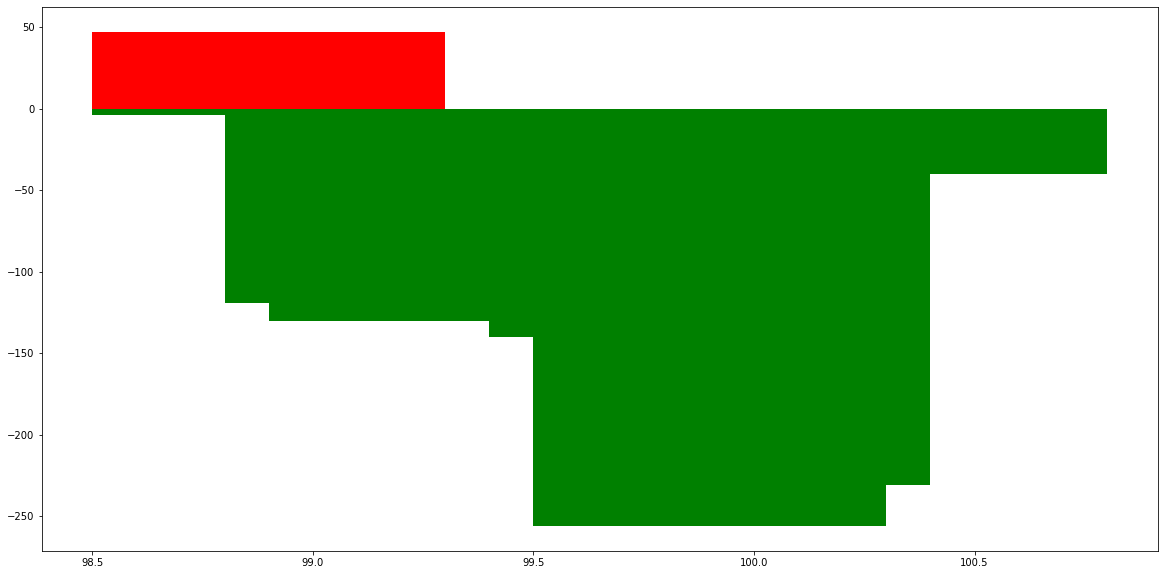

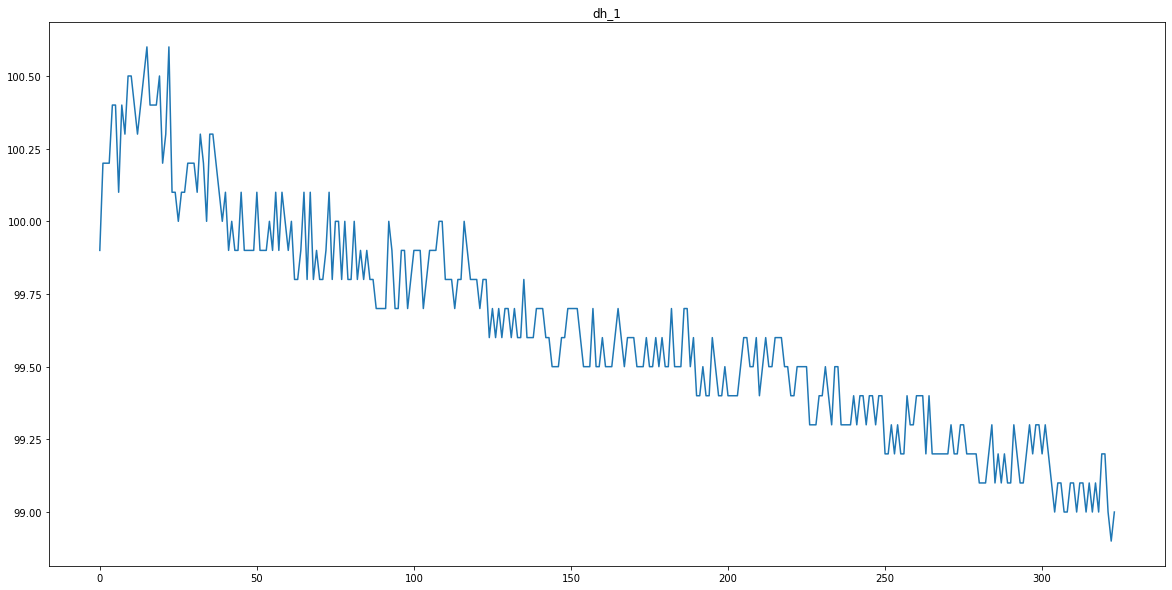

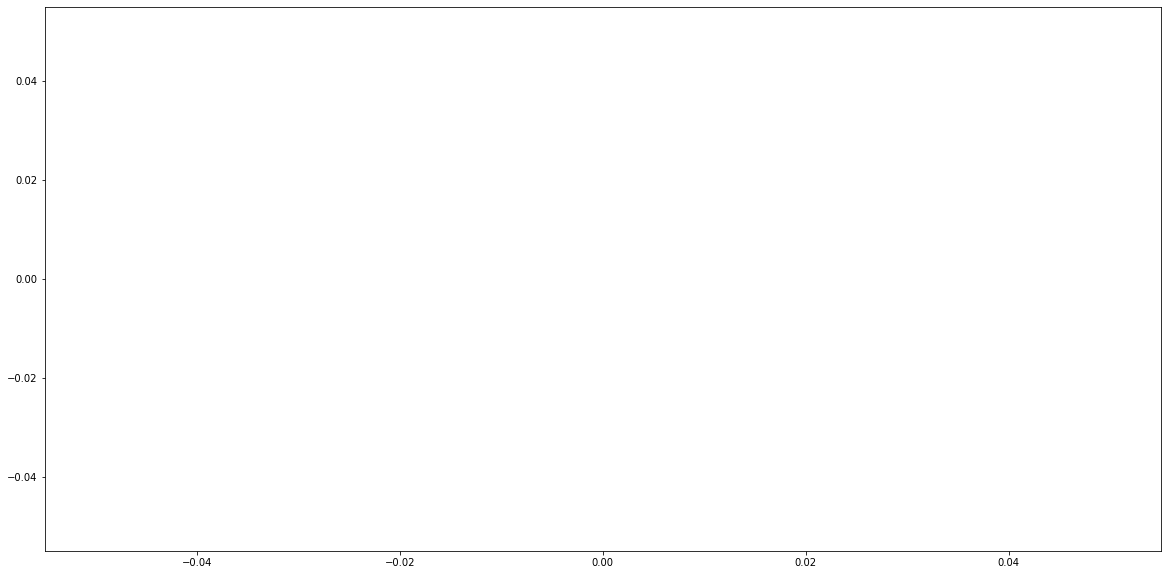

In [1249]:
from collections import defaultdict

t = list(group_names)
t.remove('zi_1000')
t.remove('fu_100')
for group_name in t:
    bids_timestep, bids_price, bids_volume, asks_timestep, asks_price, asks_volume = [], [], [], [], [], []
    bids_price_volume = defaultdict(float)
    asks_price_volume = defaultdict(float)
    for i in range(len(agent[group_name]['timestep_bid'])):
        for price, volume in agent[group_name]['timestep_bid'][i].items():
            bids_timestep.append(i)
            bids_price.append(float(price))
            bids_volume.append(volume)
            bids_price_volume[float(price)] += volume
        for price, volume in agent[group_name]['timestep_ask'][i].items():
            asks_timestep.append(i)
            asks_price.append(float(price))
            asks_volume.append(volume)
            asks_price_volume[float(price)] += volume

    bids_size = [ 400*(volume - min(bids_volume)) / max(bids_volume) - min(bids_volume) for volume in bids_volume]
    asks_size = [ 400*(volume - min(asks_volume)) / max(asks_volume) - min(asks_volume) for volume in asks_volume]
    plt.plot(tsmc['close'])
    plt.scatter(bids_timestep, bids_price, s = bids_size, c = 'r', marker = 6)
    plt.scatter(asks_timestep, asks_price, s = asks_size, c = 'g', marker = 7)
    plt.title(group_name)
    plt.show()
    plt.bar(list(bids_price_volume.keys()), list(bids_price_volume.values()), color = 'r')
    plt.bar(list(asks_price_volume.keys()), np.array(list(asks_price_volume.values())) * -1, color = 'g')
    plt.show()


## RL Agent

In [1156]:
rl_path = Path("rl_result/te/train")
rl_path = rl_path / "rl.json"
rl_states = json.loads(rl_path.read_text())

In [1157]:
# append data for maintaining the same length
rl_states['states'][-1]['action'] = rl_states['states'][-2]['action']
rl_states['states'][-1]['reward'] = rl_states['states'][-2]['reward']

In [1158]:
rl_dict = {}
for k, v in rl_states['states'][0].items():
    if type(v) != dict:
        rl_dict[k] = []
    else:
        for key in v.keys():
            rl_dict[key] = []

In [1159]:
for state in rl_states['states']:
    for k, v in state.items():
        if type(v) != dict:
            rl_dict[k].append(v)
        else:
            for key, value in v.items():
                rl_dict[key].append(value)

In [1160]:
rl_df = pd.DataFrame(rl_dict)
rl_df

,timestep,bid_volumes,ask_volumes,average,close,best_bid,best_ask,mid,cash,TSMC,wealth,action,is_valid,total_reward,action_reward,wealth_reward
0,50,"[1, 5, 26, 101, 41]","[25, 8, 135, 23, 173]","[94.0, 93.75, 93.24, 92.1, 96.46, 96.25, 95.62...","[94.0, 93.5, 92.5, 92.5, 91.0, 97.0, 98.5, 94....","[94.0, 93.5, 92.5, 92.5, 90.5, 92.5, 98.0, 94....","[95.0, 94.0, 94.0, 93.0, 91.0, 98.0, 100.0, 96...","[94.5, 93.75, 93.25, 92.75, 90.75, 95.25, 99.0...",100000.0,10,200000.0,"[1, 5, 0]",1,0.279602,0.30,-0.020398
1,51,"[7, 99, 41, 12, 10]","[1, 3, 57, 3, 8]","[94.6, 94.0, 93.75, 93.24, 92.1, 96.46, 96.25,...","[93.5, 94.0, 93.5, 92.5, 92.5, 91.0, 97.0, 98....","[92.5, 94.0, 93.5, 92.5, 92.5, 90.5, 92.5, 98....","[93.5, 95.0, 94.0, 94.0, 93.0, 91.0, 98.0, 100...","[93.0, 94.5, 93.75, 93.25, 92.75, 90.75, 95.25...",100000.0,9,194000.0,"[1, 8, 4]",1,0.289763,0.30,-0.010237
2,52,"[58, 4, 4, 26, 1]","[48, 35, 44, 8, 173]","[93.79, 94.6, 94.0, 93.75, 93.24, 92.1, 96.46,...","[96.0, 93.5, 94.0, 93.5, 92.5, 92.5, 91.0, 97....","[95.5, 92.5, 94.0, 93.5, 92.5, 92.5, 90.5, 92....","[96.0, 93.5, 95.0, 94.0, 94.0, 93.0, 91.0, 98....","[95.75, 93.0, 94.5, 93.75, 93.25, 92.75, 90.75...",157185.4,4,194600.0,"[2, 2, 2]",1,-0.028951,-0.02,-0.008951
3,53,"[4, 40, 12, 10, 9]","[53, 24, 182, 43, 39]","[96.01, 93.79, 94.6, 94.0, 93.75, 93.24, 92.1,...","[97.0, 96.0, 93.5, 94.0, 93.5, 92.5, 92.5, 91....","[96.0, 95.5, 92.5, 94.0, 93.5, 92.5, 92.5, 90....","[97.0, 96.0, 93.5, 95.0, 94.0, 94.0, 93.0, 91....","[96.5, 95.75, 93.0, 94.5, 93.75, 93.25, 92.75,...",157185.4,4,194701.4,"[0, 4, 0]",1,0.295647,0.30,-0.004353
4,54,"[2, 23, 7, 9, 28]","[177, 52, 39, 146, 17]","[96.32, 96.01, 93.79, 94.6, 94.0, 93.75, 93.24...","[98.0, 97.0, 96.0, 93.5, 94.0, 93.5, 92.5, 92....","[96.0, 96.0, 95.5, 92.5, 94.0, 93.5, 92.5, 92....","[98.0, 97.0, 96.0, 93.5, 95.0, 94.0, 94.0, 93....","[97.0, 96.5, 95.75, 93.0, 94.5, 93.75, 93.25, ...",147616.2,5,195589.4,"[1, 7, 1]",1,0.295914,0.30,-0.004086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16196,16246,"[112, 96, 215, 285, 81]","[45, 9, 7, 9, 11]","[75.32, 74.72, 74.95, 75.84, 76.08, 76.49, 76....","[73.0, 74.5, 73.5, 76.5, 77.0, 74.5, 75.5, 76....","[73.0, 75.5, 73.0, 74.0, 75.5, 75.5, 77.0, 76....","[74.5, 78.5, 73.5, 77.0, 77.5, 77.0, 77.5, 76....","[73.75, 77.0, 73.25, 75.5, 76.5, 76.25, 77.25,...",2765316.1,48,3074657.7,"[1, 2, 0]",1,3.180072,0.30,2.880072
16197,16247,"[94, 270, 288, 81, 78]","[1, 1, 3, 8, 7]","[74.33, 75.32, 74.72, 74.95, 75.84, 76.08, 76....","[72.5, 73.0, 74.5, 73.5, 76.5, 77.0, 74.5, 75....","[72.5, 73.0, 75.5, 73.0, 74.0, 75.5, 75.5, 77....","[73.5, 74.5, 78.5, 73.5, 77.0, 77.5, 77.0, 77....","[73.0, 73.75, 77.0, 73.25, 75.5, 76.5, 76.25, ...",2772801.1,47,3077537.7,"[0, 5, 2]",1,3.173985,0.30,2.873985
16198,16248,"[9, 261, 309, 154, 82]","[1, 27, 10, 7, 155]","[73.7, 74.33, 75.32, 74.72, 74.95, 75.84, 76.0...","[72.5, 72.5, 73.0, 74.5, 73.5, 76.5, 77.0, 74....","[72.5, 72.5, 73.0, 75.5, 73.0, 74.0, 75.5, 75....","[73.0, 73.5, 74.5, 78.5, 73.5, 77.0, 77.5, 77....","[72.75, 73.0, 73.75, 77.0, 73.25, 75.5, 76.5, ...",2751157.9,47,3072837.7,"[0, 0, 3]",1,3.170466,0.30,2.870466
16199,16249,"[2, 235, 482, 178, 196]","[3, 208, 109, 7, 36]","[73.83, 73.7, 74.33, 75.32, 74.72, 74.95, 75.8...","[73.0, 72.5, 72.5, 73.0, 74.5, 73.5, 76.5, 77....","[73.0, 72.5, 72.5, 73.0, 75.5, 73.0, 74.0, 75....","[78.0, 73.0, 73.5, 74.5, 78.5, 73.5, 77.0, 77....","[75.5, 72.75, 73.0, 73.75, 77.0, 73.25, 75.5, ...",2721298.3,51,3069876.7,"[1, 3, 0]",1,3.170947,0.30,2.870947


Reward

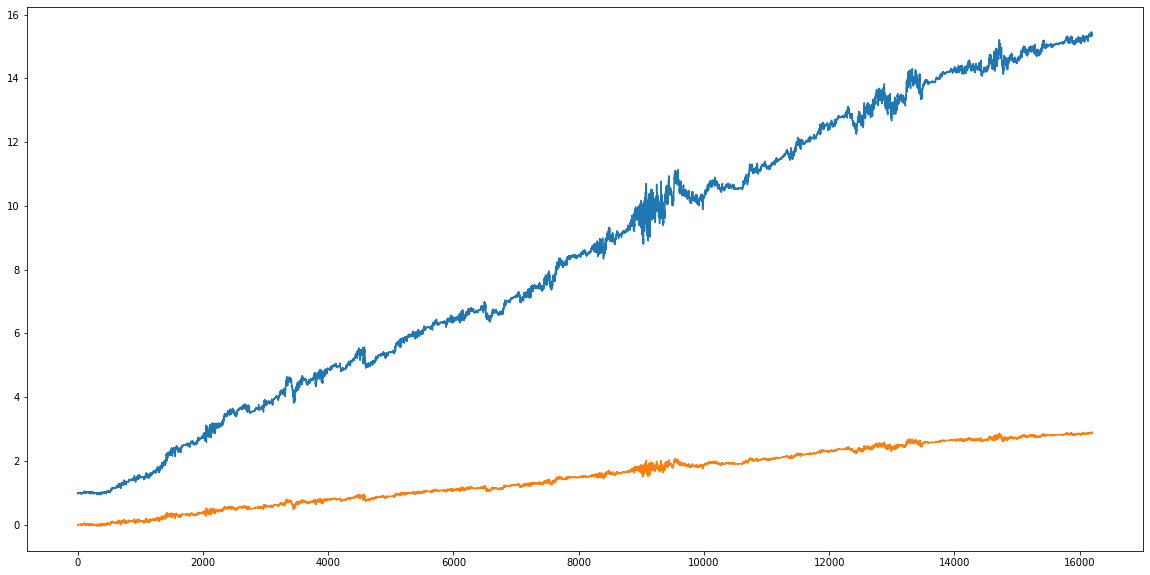

In [1161]:
plt.plot(rl_df.wealth / rl_df.wealth[0])
plt.plot(rl_df.wealth_reward)

Action

In [1162]:
'''
1. Discrete 3 - BUY[0], SELL[1], HOLD[2]
2. Discrete 9 - TICK_-4[0], TICK_-3[1], TICK_-2[2], TICK_-1[3], TICK_0[4], TICK_1[5], TICK_2[6], TICK_3[7], TICK_4[8]
3. Discrete 5 - VOLUME_1[0], VOLUME_2[1], VOLUME_3[2], VOLUME_4[3], VOLUME_5[4],
'''
valid_action_rate = rl_df.is_valid.mean()
bid_rate = rl_df.action.apply(lambda x: int(x[0]) == 0).mean()
ask_rate = rl_df.action.apply(lambda x: int(x[1]) == 0).mean()
hold_rate = rl_df.action.apply(lambda x: int(x[2]) == 0).mean()
print(f"Bid rate: {bid_rate}\nAsk rate: {ask_rate}\nHold rate: {hold_rate}\nValid action rate: {valid_action_rate}")

Bid rate: 0.32689340164187397
Ask rate: 0.11647429171038824
Hold rate: 0.19782729461144374
Valid action rate: 0.9783346706993395


In [1163]:
rl_orders = rl_states['orders']

In [1164]:
bid_x, bid_y = [], []
ask_x, ask_y = [], []
bid_sizes, ask_sizes = [], []
bid_colors, ask_colors = [], []
base_size = 200
for order in rl_orders:
    if order['bid_or_ask'] == 'BID':
        if order['time'] > 5000 and order['time'] < 5100:
            bid_x.append(order['time'])
            bid_y.append(order['price'])
            bid_colors.append('r')
            bid_sizes.append(base_size * order['volume'])
    if order['bid_or_ask'] == 'ASK':
        if order['time'] > 5000 and order['time'] < 5100:
            ask_x.append(order['time'])
            ask_y.append(order['price'])
            ask_colors.append('g')  
            ask_sizes.append(base_size * order['volume'])

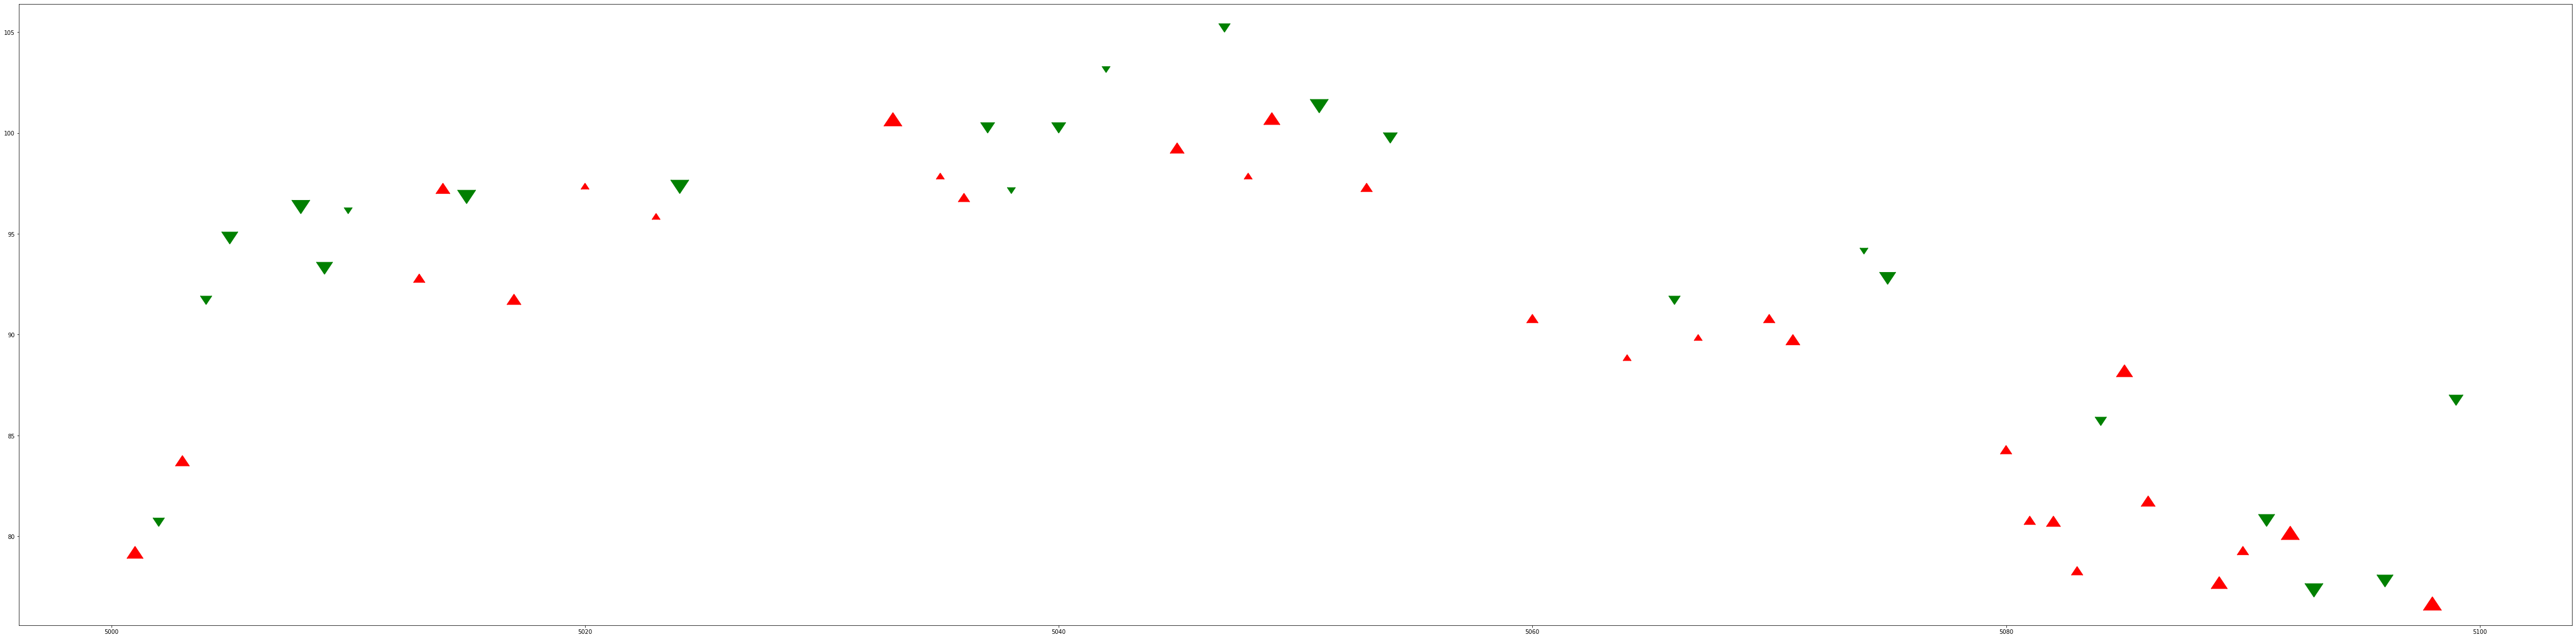

In [1165]:
x = np.arange(len(tsmc['close']))
plt.figure(figsize=(80, 20))
plt.plot(x[4999: 5101], tsmc['close'][4999:5101])
plt.scatter(bid_x, bid_y, s = bid_sizes, c = bid_colors, marker = 6)
plt.scatter(ask_x, ask_y, s = ask_sizes, c = ask_colors, marker = 7)
plt.show()